In [57]:
from numpy import expand_dims
from numpy import zeros
from numpy import ones
from numpy import vstack
from numpy.random import randn
from numpy.random import randint
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Reshape
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from keras.layers import Dropout
from matplotlib import pyplot as plt
import os
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [58]:
from PIL import Image
import numpy as np
import cv2  # pip install opencv-python

In [59]:
cwd = os.getcwd()
os.chdir(cwd)
print(os.listdir("datasets/datasetsAugmented/"))

['DatasetCartoon', 'DatasetcartoonCharactersFull', 'Datasetheroicfantasy', 'DatasetsagaIntergalactique', 'Datasetsuperheroes', 'DatasetVideoGamingCharacters']


In [60]:
#Data augmentation
datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

url = "C:/Users/arnaud.baleh/Desktop/dataIA/projetFilRouge/E1_projetFilRougeDl/datasets/cartoonCharacters/"
for path in os.listdir(url):        
    img = load_img('C:/Users/arnaud.baleh/Desktop/dataIA/projetFilRouge/E1_projetFilRougeDl/datasets/cartoonCharacters/' + path)  # this is a PIL image
    x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
    x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

    # the .flow() command below generates batches of randomly transformed images
    # and saves the results to the `preview/` directory
    i = 0
    for batch in datagen.flow(x, batch_size=1,
                              save_to_dir='datasets/datasetsAugmented/DatasetcartoonCharactersFull/', save_prefix='cartoonCharacters', save_format='png'):
        i += 1
        if i > 20:
            break  # otherwise the generator would loop indefinitely

In [61]:
path_characters = []
train_path_characters = "C:/Users/arnaud.baleh/Desktop/dataIA/projetFilRouge/E1_projetFilRougeDl/datasets/datasetsAugmented/DatasetcartoonCharactersFull/"
for path in os.listdir(train_path_characters):
    if '.png' in path:
        path_characters.append(os.path.join(train_path_characters, path))

lenghtSplit = round(len(path_characters) * 0.95)
new_path=path_characters[0:lenghtSplit]

In [62]:
images = [np.array(Image.open(path).resize((32,32))) for path in path_characters]

#for i in range(len(images)):
    #images[i] = ((images[i] - images[i].min())/(255 - images[i].min()))
    #images[i] = images[i]*2-1  #decommenter si fonction d activation est tanh pour la dernière couche du generateur

images = np.array(images)

train_data=images

In [65]:
train_data = np.array(train_data)

In [66]:
print(train_data.shape)

(9156, 32, 32, 3)


In [67]:
print(type(train_data))

<class 'numpy.ndarray'>


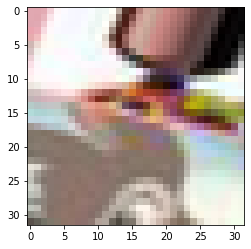

In [71]:
plt.imshow(train_data[45])

In [23]:
np.shape(images)

(9129, 32, 32, 3)

In [28]:
tailleInitiale = len(images)
print(tailleInitiale)

9129


In [34]:
'''
from numpy import asarray
from numpy import savetxt
# load numpy array from csv file
from numpy import loadtxt
#Pour sauvegarder un fichier numpy dans un csv file, il faut le redimensionner en 1D
'''

In [35]:
#imagesReshape1D = images.reshape(-1)

In [36]:
#np.shape(imagesReshape1D)

(28044288,)

In [37]:
# save to csv file
#savetxt('csvFiles/dataCartoon.csv', imagesReshape1D, delimiter=',')

In [38]:
# load array
#data = loadtxt('csvFiles/dataCartoon.csv', delimiter=',')
# print the array
#print(data)

[0.96774194 1.         0.97177419 ... 0.9254902  0.67058824 0.56470588]


In [39]:
#imagesReshape4D = data.reshape(tailleInitiale,32,32,3)

In [40]:
#np.shape(imagesReshape4D)

(9129, 32, 32, 3)

In [ ]:
#essai

In [55]:
from keras.datasets.cifar10 import load_data

In [11]:
(trainX, _), (_, _) = load_data()

In [12]:
print(type(trainX))

<class 'numpy.ndarray'>


In [14]:
print(trainX.shape)

(50000, 32, 32, 3)


In [15]:
# convert from unsigned ints to floats
X = trainX.astype('float32')

In [16]:
print(type(X))

<class 'numpy.ndarray'>


In [17]:
print(X.shape)

(50000, 32, 32, 3)


In [ ]:
#****************

In [46]:
import image_dataset_loader

In [50]:
class ImageLoader:
    """Load images in arrays without batches."""

    def __init__(self, train_dir, test_dir):
        """Create class."""
        self.train_dir = train_dir
        self.test_dir = test_dir

    def load_data(self):
        """Load the data."""
        features, labels = [], []

        for source in [self.train_dir, self.test_dir]:
            input, output = [], []
            for class_name in os.listdir(source):
                if os.path.isdir(class_name):
                    for img_name in os.listdir(class_name):
                        img = cv2.imread(os.path.join(self.train_dir, class_name, img_name))

                        # ...
                        # Modify your image array here.
                        # ...

                        input.append(img)
                        output.append(class_name)  # or other method to convert label

            # Shuffle labels.
            combine = list(zip(input, output))  # zip as list for Python 3
            np.random.shuffle(combine)
            input, output = zip(*combine)
            features.append(input)
            labels.append(output)

        return [[np.array(features[0], dtype=np.float32),
                 np.array(labels[0], dtype=np.float32)],
                [np.array(features[1], dtype=np.float32),
                 np.array(labels[1], dtype=np.float32)]]


In [72]:
class Discriminator:
    def __init__(self,L,l,C):
        self.__L = L
        self.__l = l
        self.__C = C
        self.__in_shape = (self.__L,self.__l,self.__C)
    
    def build_model(self):
        model = Sequential()
        # normal
        model.add(Conv2D(64, (3,3), padding='same', input_shape=self.__in_shape))
        model.add(LeakyReLU(alpha=0.2))
        # reduction echantillon
        model.add(Conv2D(128, (3,3), strides=(2,2), padding='same'))
        model.add(LeakyReLU(alpha=0.2))
        # reduction echantillon
        model.add(Conv2D(128, (3,3), strides=(2,2), padding='same'))
        model.add(LeakyReLU(alpha=0.2))
        # reduction echantillon
        model.add(Conv2D(256, (3,3), strides=(2,2), padding='same'))
        model.add(LeakyReLU(alpha=0.2))
        # classification
        model.add(Flatten())
        model.add(Dropout(0.4))
        model.add(Dense(1, activation='sigmoid'))
        # compiler modele
        opt = Adam(lr=0.0002, beta_1=0.5)
        model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
        return model
    
class Generator:
    def __init__(self,latent_dim):
        self.__latent_dim = latent_dim
    
    def build_model(self):
        model = Sequential()
        # 4x4 image
        n_nodes = 256 * 4 * 4
        model.add(Dense(n_nodes, input_dim=self.__latent_dim))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Reshape((4, 4, 256)))
        # agrandissement echantillon à 8x8
        model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
        model.add(LeakyReLU(alpha=0.2))
        # agrandissement echantillon à 16*16
        model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
        model.add(LeakyReLU(alpha=0.2))
        # agrandissement echantillon à 32x32
        model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
        model.add(LeakyReLU(alpha=0.2))
        # couche de sortie
        model.add(Conv2D(3, (3,3), activation='tanh', padding='same'))
        return model
 
    # defini une combinaison du generateur et discriminateur, pour mettre à jour le generateur
def define_gan(g_model, d_model):
    # rendre les poids du discriminateur non entrainable
    d_model.trainable = False
    # les connecter
    model = Sequential()
    # ajout generateur
    model.add(g_model)
    # ajout discriminator
    model.add(d_model)
    # compiler le modele
    opt = Adam(lr=0.0002, beta_1=0.5)
    model.compile(loss='binary_crossentropy', optimizer=opt)
    return model
 

def load_real_samples():
    
    trainX = train_data
    X = trainX.astype('float32')
    X = (X - 127.5) / 127.5
    return X

    # changer l echelle de valeur [0,255] vers [-1,1]
    X = (X - 127.5) / 127.5
    # load cifar10 dataset
    #(trainX, _), (_, _) = load_data()
    #print(type(trainX))
    #print(trainX.shape)
    #cartoons = ImageLoader('C:/Users/arnaud.baleh/Desktop/dataIA/projetFilRouge/E1_projetFilRougeDl/datasets/datasetsAugmented/DatasetCartoon/train/', 'C:/Users/arnaud.baleh/Desktop/dataIA/projetFilRouge/E1_projetFilRougeDl/datasets/datasetsAugmented/DatasetCartoon/test/')
    #(trainX, _), (_, _) = cartoons.load_data()
    #(trainX, trainY), = cartoons.load_data()
    #(x_train, y_train), = image_dataset_loader.load('./datasets/datasetsAugmented/DatasetCartoon/', ['train'],shuffle=True, seed=None, x_dtype='uint8', y_dtype='uint32')
    # convertir d unsigned ints vers float32
    #X = x_train.astype('float32')
    X = trainX.astype('float32')
    # changer l echelle de valeur [0,255] vers [-1,1]
    X = (X - 127.5) / 127.5
    return X
 
# select real samples
def generate_real_samples(dataset, n_samples):
    # choose random instances
    ix = randint(0, dataset.shape[0], n_samples)
    # retrieve selected images
    X = dataset[ix]
    # generate 'real' class labels (1)
    y = ones((n_samples, 1))
    return X, y
 
# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n_samples):
    # generate points in the latent space
    x_input = randn(latent_dim * n_samples)
    # reshape into a batch of inputs for the network
    x_input = x_input.reshape(n_samples, latent_dim)
    return x_input
 
# use the generator to generate n fake examples, with class labels
def generate_fake_samples(g_model, latent_dim, n_samples):
    # generate points in latent space
    x_input = generate_latent_points(latent_dim, n_samples)
    # predict outputs
    X = g_model.predict(x_input)
    # create 'fake' class labels (0)
    y = zeros((n_samples, 1))
    return X, y
 
# create and save a plot of generated images
def save_plot(examples, epoch, n=7):
    # scale from [-1,1] to [0,1]
    examples = (examples + 1) / 2.0
    # plot images
    for i in range(n * n):
        # define subplot
        pyplot.subplot(n, n, 1 + i)
        # turn off axis
        pyplot.axis('off')
        # plot raw pixel data
        pyplot.imshow(examples[i])
    # save plot to file
    filename = 'generated_plot_e%03d.png' % (epoch+1)
    pyplot.savefig(filename)
    pyplot.close()
 
    # evaluate the discriminator, plot generated images, save generator model
def summarize_performance(epoch, g_model, d_model, dataset, latent_dim, n_samples=150):
    # prepare real samples
    X_real, y_real = generate_real_samples(dataset, n_samples)
    # evaluate discriminator on real examples
    _, acc_real = d_model.evaluate(X_real, y_real, verbose=0)
    # prepare fake examples
    x_fake, y_fake = generate_fake_samples(g_model, latent_dim, n_samples)
    # evaluate discriminator on fake examples
    _, acc_fake = d_model.evaluate(x_fake, y_fake, verbose=0)
    # summarize discriminator performance
    print('>Accuracy real: %.0f%%, fake: %.0f%%' % (acc_real*100, acc_fake*100))
    # save plot
    save_plot(x_fake, epoch)
    # save the generator model tile file
    filename = 'generator_model_%03d.h5' % (epoch+1)
    g_model.save(filename)
 
    # train the generator and discriminator
def train(g_model, d_model, gan_model, dataset, latent_dim, n_epochs=200, n_batch=128):
    bat_per_epo = int(dataset.shape[0] / n_batch)
    half_batch = int(n_batch / 2)
    # manually enumerate epochs
    for i in range(n_epochs):
        # enumerate batches over the training set
        for j in range(bat_per_epo):
            # get randomly selected 'real' samples
            X_real, y_real = generate_real_samples(dataset, half_batch)
            # update discriminator model weights
            d_loss1, _ = d_model.train_on_batch(X_real, y_real)
            # generate 'fake' examples
            X_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
            # update discriminator model weights
            d_loss2, _ = d_model.train_on_batch(X_fake, y_fake)
            # prepare points in latent space as input for the generator
            X_gan = generate_latent_points(latent_dim, n_batch)
            # create inverted labels for the fake samples
            y_gan = ones((n_batch, 1))
            # update the generator via the discriminator's error
            g_loss = gan_model.train_on_batch(X_gan, y_gan)
            # summarize loss on this batch
            print('>%d, %d/%d, d1=%.3f, d2=%.3f g=%.3f' %
                (i+1, j+1, bat_per_epo, d_loss1, d_loss2, g_loss))
        # evaluate the model performance, sometimes
        if (i+1) % 10 == 0:
            summarize_performance(i, g_model, d_model, dataset, latent_dim)
 
    # size of the latent space
latent_dim = 100
# create the discriminator
d_model = Discriminator(32,32,3)
d_model = d_model.build_model()
# create the generator
g_model = Generator(latent_dim)
g_model = g_model.build_model()
# create the gan
gan_model = define_gan(g_model, d_model)
# load image data
dataset = load_real_samples()
# train model
train(g_model, d_model, gan_model, dataset, latent_dim)

>1, 1/71, d1=0.667, d2=0.696 g=0.691
>1, 2/71, d1=0.557, d2=0.699 g=0.688
>1, 3/71, d1=0.457, d2=0.707 g=0.681
>1, 4/71, d1=0.374, d2=0.724 g=0.666
>1, 5/71, d1=0.268, d2=0.757 g=0.642
>1, 6/71, d1=0.199, d2=0.817 g=0.610
>1, 7/71, d1=0.101, d2=0.865 g=0.604
>1, 8/71, d1=0.135, d2=0.854 g=0.645
>1, 9/71, d1=0.086, d2=0.756 g=0.756
>1, 10/71, d1=0.118, d2=0.630 g=0.897
>1, 11/71, d1=0.105, d2=0.555 g=0.990
>1, 12/71, d1=0.071, d2=0.545 g=1.008
>1, 13/71, d1=0.096, d2=0.585 g=0.932
>1, 14/71, d1=0.043, d2=0.626 g=0.873
>1, 15/71, d1=0.055, d2=0.646 g=0.838
>1, 16/71, d1=0.127, d2=0.728 g=0.764
>1, 17/71, d1=0.101, d2=0.887 g=0.666
>1, 18/71, d1=0.054, d2=1.028 g=0.653
>1, 19/71, d1=0.103, d2=0.904 g=0.758
>1, 20/71, d1=0.092, d2=0.654 g=0.971
>1, 21/71, d1=0.085, d2=0.482 g=1.197
>1, 22/71, d1=0.083, d2=0.422 g=1.253
>1, 23/71, d1=0.059, d2=0.434 g=1.167
>1, 24/71, d1=0.034, d2=0.476 g=1.035
>1, 25/71, d1=0.016, d2=0.515 g=0.954
>1, 26/71, d1=0.015, d2=0.536 g=0.912
>1, 27/71, d1=0.011, 

>4, 5/71, d1=0.616, d2=0.461 g=2.016
>4, 6/71, d1=0.505, d2=0.400 g=2.129
>4, 7/71, d1=0.967, d2=0.407 g=1.713
>4, 8/71, d1=0.628, d2=0.547 g=1.465
>4, 9/71, d1=0.505, d2=0.424 g=1.771
>4, 10/71, d1=0.735, d2=0.361 g=1.655
>4, 11/71, d1=0.480, d2=0.542 g=1.731
>4, 12/71, d1=0.433, d2=0.799 g=1.903
>4, 13/71, d1=0.565, d2=0.325 g=1.800
>4, 14/71, d1=0.592, d2=0.349 g=1.760
>4, 15/71, d1=0.431, d2=0.474 g=1.792
>4, 16/71, d1=0.569, d2=0.439 g=1.751
>4, 17/71, d1=0.567, d2=0.364 g=1.683
>4, 18/71, d1=0.619, d2=0.521 g=1.549
>4, 19/71, d1=0.500, d2=0.540 g=1.817
>4, 20/71, d1=0.681, d2=0.527 g=1.842
>4, 21/71, d1=0.774, d2=0.526 g=1.715
>4, 22/71, d1=0.679, d2=0.513 g=1.683
>4, 23/71, d1=0.669, d2=0.498 g=1.671
>4, 24/71, d1=0.590, d2=0.376 g=1.689
>4, 25/71, d1=0.877, d2=0.537 g=1.581
>4, 26/71, d1=0.488, d2=0.367 g=1.830
>4, 27/71, d1=0.513, d2=0.295 g=2.015
>4, 28/71, d1=0.478, d2=0.232 g=1.969
>4, 29/71, d1=0.340, d2=0.206 g=2.116
>4, 30/71, d1=0.360, d2=0.262 g=2.097
>4, 31/71, d1=0.3

>7, 9/71, d1=0.550, d2=0.342 g=2.151
>7, 10/71, d1=0.364, d2=0.264 g=2.104
>7, 11/71, d1=0.308, d2=0.330 g=2.194
>7, 12/71, d1=0.382, d2=0.450 g=2.125
>7, 13/71, d1=0.413, d2=0.339 g=2.307
>7, 14/71, d1=0.275, d2=0.388 g=2.205
>7, 15/71, d1=0.244, d2=0.257 g=2.458
>7, 16/71, d1=0.496, d2=0.398 g=2.241
>7, 17/71, d1=0.330, d2=0.285 g=2.220
>7, 18/71, d1=0.324, d2=0.384 g=2.107
>7, 19/71, d1=0.430, d2=0.386 g=1.883
>7, 20/71, d1=0.369, d2=0.441 g=1.775
>7, 21/71, d1=0.434, d2=0.514 g=1.646
>7, 22/71, d1=0.534, d2=0.500 g=1.568
>7, 23/71, d1=0.921, d2=0.509 g=1.456
>7, 24/71, d1=0.495, d2=0.449 g=1.595
>7, 25/71, d1=0.623, d2=0.372 g=1.601
>7, 26/71, d1=0.427, d2=0.339 g=1.624
>7, 27/71, d1=0.331, d2=0.332 g=1.665
>7, 28/71, d1=0.314, d2=0.340 g=1.597
>7, 29/71, d1=0.263, d2=0.342 g=1.627
>7, 30/71, d1=0.406, d2=0.395 g=1.536
>7, 31/71, d1=0.319, d2=0.405 g=1.529
>7, 32/71, d1=0.276, d2=0.391 g=1.592
>7, 33/71, d1=0.440, d2=0.359 g=1.504
>7, 34/71, d1=0.373, d2=0.406 g=1.530
>7, 35/71, d1

>10, 13/71, d1=0.405, d2=0.427 g=1.808
>10, 14/71, d1=0.463, d2=0.413 g=1.755
>10, 15/71, d1=0.368, d2=0.359 g=1.667
>10, 16/71, d1=0.481, d2=0.475 g=1.638
>10, 17/71, d1=0.358, d2=0.384 g=1.588
>10, 18/71, d1=0.407, d2=0.339 g=1.684
>10, 19/71, d1=0.426, d2=0.480 g=1.578
>10, 20/71, d1=0.311, d2=0.462 g=1.661
>10, 21/71, d1=0.244, d2=0.383 g=1.794
>10, 22/71, d1=0.322, d2=0.447 g=1.695
>10, 23/71, d1=0.315, d2=0.606 g=1.625
>10, 24/71, d1=0.368, d2=1.172 g=1.675
>10, 25/71, d1=0.628, d2=1.468 g=1.686
>10, 26/71, d1=0.622, d2=0.847 g=2.301
>10, 27/71, d1=0.863, d2=0.431 g=2.481
>10, 28/71, d1=0.668, d2=0.282 g=2.413
>10, 29/71, d1=0.610, d2=0.340 g=2.325
>10, 30/71, d1=0.528, d2=0.298 g=2.095
>10, 31/71, d1=0.696, d2=0.516 g=2.026
>10, 32/71, d1=0.796, d2=0.438 g=2.209
>10, 33/71, d1=0.916, d2=0.369 g=2.128
>10, 34/71, d1=0.880, d2=0.693 g=2.446
>10, 35/71, d1=0.918, d2=0.306 g=2.326
>10, 36/71, d1=0.800, d2=0.445 g=2.367
>10, 37/71, d1=0.735, d2=0.395 g=2.416
>10, 38/71, d1=0.905, d2=

>13, 10/71, d1=0.645, d2=0.502 g=1.879
>13, 11/71, d1=0.617, d2=0.465 g=1.736
>13, 12/71, d1=0.712, d2=0.595 g=1.853
>13, 13/71, d1=0.638, d2=0.480 g=1.776
>13, 14/71, d1=0.517, d2=0.714 g=1.661
>13, 15/71, d1=0.568, d2=0.528 g=1.924
>13, 16/71, d1=0.632, d2=0.611 g=1.795
>13, 17/71, d1=0.553, d2=0.368 g=1.849
>13, 18/71, d1=0.671, d2=0.389 g=1.638
>13, 19/71, d1=0.334, d2=0.340 g=1.822
>13, 20/71, d1=0.161, d2=0.412 g=1.838
>13, 21/71, d1=0.132, d2=0.490 g=2.204
>13, 22/71, d1=0.191, d2=0.349 g=2.411
>13, 23/71, d1=0.146, d2=0.161 g=2.484
>13, 24/71, d1=0.160, d2=0.167 g=2.455
>13, 25/71, d1=0.108, d2=0.182 g=2.508
>13, 26/71, d1=0.076, d2=0.324 g=2.457
>13, 27/71, d1=0.067, d2=0.221 g=2.578
>13, 28/71, d1=0.150, d2=0.476 g=2.666
>13, 29/71, d1=0.305, d2=0.780 g=2.689
>13, 30/71, d1=0.473, d2=1.089 g=3.278
>13, 31/71, d1=0.555, d2=0.179 g=3.371
>13, 32/71, d1=0.775, d2=0.493 g=4.385
>13, 33/71, d1=0.776, d2=0.069 g=4.094
>13, 34/71, d1=0.662, d2=0.279 g=2.176
>13, 35/71, d1=0.432, d2=

>16, 8/71, d1=0.525, d2=0.581 g=1.653
>16, 9/71, d1=0.417, d2=0.409 g=1.698
>16, 10/71, d1=0.391, d2=0.353 g=1.757
>16, 11/71, d1=0.410, d2=0.347 g=1.804
>16, 12/71, d1=0.411, d2=0.375 g=1.690
>16, 13/71, d1=0.391, d2=0.368 g=1.792
>16, 14/71, d1=0.512, d2=0.378 g=1.713
>16, 15/71, d1=0.445, d2=0.488 g=1.522
>16, 16/71, d1=0.452, d2=0.653 g=1.837
>16, 17/71, d1=0.534, d2=0.407 g=1.796
>16, 18/71, d1=0.453, d2=0.404 g=1.748
>16, 19/71, d1=0.672, d2=0.724 g=1.671
>16, 20/71, d1=0.602, d2=0.541 g=1.856
>16, 21/71, d1=0.863, d2=0.388 g=1.726
>16, 22/71, d1=0.470, d2=0.378 g=1.656
>16, 23/71, d1=0.365, d2=0.337 g=1.815
>16, 24/71, d1=0.412, d2=0.415 g=1.984
>16, 25/71, d1=0.458, d2=0.370 g=2.035
>16, 26/71, d1=0.397, d2=0.636 g=2.383
>16, 27/71, d1=0.600, d2=0.312 g=2.164
>16, 28/71, d1=0.723, d2=0.630 g=2.013
>16, 29/71, d1=0.703, d2=0.888 g=2.164
>16, 30/71, d1=0.895, d2=0.500 g=2.176
>16, 31/71, d1=0.774, d2=0.397 g=2.018
>16, 32/71, d1=0.783, d2=0.469 g=1.823
>16, 33/71, d1=0.513, d2=0.

>19, 6/71, d1=0.542, d2=0.521 g=1.522
>19, 7/71, d1=0.520, d2=0.403 g=1.667
>19, 8/71, d1=0.636, d2=0.391 g=1.674
>19, 9/71, d1=0.493, d2=0.417 g=1.660
>19, 10/71, d1=0.401, d2=0.430 g=1.780
>19, 11/71, d1=0.476, d2=0.433 g=1.829
>19, 12/71, d1=0.524, d2=0.412 g=1.754
>19, 13/71, d1=0.588, d2=0.448 g=1.689
>19, 14/71, d1=0.583, d2=0.598 g=1.726
>19, 15/71, d1=0.716, d2=0.376 g=1.557
>19, 16/71, d1=0.607, d2=0.554 g=1.589
>19, 17/71, d1=0.699, d2=0.434 g=1.488
>19, 18/71, d1=0.705, d2=0.536 g=1.432
>19, 19/71, d1=0.552, d2=0.403 g=1.478
>19, 20/71, d1=0.558, d2=0.402 g=1.445
>19, 21/71, d1=0.546, d2=0.530 g=1.225
>19, 22/71, d1=0.326, d2=0.467 g=1.471
>19, 23/71, d1=0.463, d2=0.426 g=1.554
>19, 24/71, d1=0.482, d2=0.360 g=1.367
>19, 25/71, d1=0.548, d2=0.559 g=1.494
>19, 26/71, d1=0.469, d2=0.368 g=1.496
>19, 27/71, d1=0.449, d2=0.437 g=1.334
>19, 28/71, d1=0.458, d2=0.595 g=1.469
>19, 29/71, d1=0.544, d2=0.649 g=1.423
>19, 30/71, d1=0.590, d2=0.722 g=1.448
>19, 31/71, d1=0.933, d2=0.73

>22, 3/71, d1=0.391, d2=0.405 g=1.364
>22, 4/71, d1=0.396, d2=0.471 g=1.441
>22, 5/71, d1=0.409, d2=0.489 g=1.415
>22, 6/71, d1=0.346, d2=0.430 g=1.470
>22, 7/71, d1=0.461, d2=0.409 g=1.444
>22, 8/71, d1=0.422, d2=0.636 g=1.398
>22, 9/71, d1=0.375, d2=0.484 g=1.502
>22, 10/71, d1=0.483, d2=0.473 g=1.359
>22, 11/71, d1=0.449, d2=0.553 g=1.221
>22, 12/71, d1=0.370, d2=0.545 g=1.277
>22, 13/71, d1=0.343, d2=0.485 g=1.339
>22, 14/71, d1=0.303, d2=0.449 g=1.447
>22, 15/71, d1=0.355, d2=0.430 g=1.499
>22, 16/71, d1=0.313, d2=0.430 g=1.487
>22, 17/71, d1=0.282, d2=0.353 g=1.621
>22, 18/71, d1=0.310, d2=0.369 g=1.670
>22, 19/71, d1=0.335, d2=0.355 g=1.583
>22, 20/71, d1=0.354, d2=0.491 g=1.494
>22, 21/71, d1=0.316, d2=0.556 g=1.773
>22, 22/71, d1=0.721, d2=0.464 g=1.624
>22, 23/71, d1=0.616, d2=0.928 g=1.896
>22, 24/71, d1=0.942, d2=0.521 g=1.667
>22, 25/71, d1=0.990, d2=1.100 g=1.822
>22, 26/71, d1=1.324, d2=0.437 g=1.742
>22, 27/71, d1=1.214, d2=0.581 g=1.597
>22, 28/71, d1=0.950, d2=0.637 g

>25, 1/71, d1=0.631, d2=0.596 g=1.262
>25, 2/71, d1=0.601, d2=0.608 g=1.256
>25, 3/71, d1=0.495, d2=0.497 g=1.268
>25, 4/71, d1=0.587, d2=0.566 g=1.385
>25, 5/71, d1=0.617, d2=0.605 g=1.264
>25, 6/71, d1=0.511, d2=0.570 g=1.305
>25, 7/71, d1=0.490, d2=0.501 g=1.318
>25, 8/71, d1=0.495, d2=0.543 g=1.295
>25, 9/71, d1=0.518, d2=0.515 g=1.282
>25, 10/71, d1=0.618, d2=0.528 g=1.117
>25, 11/71, d1=0.478, d2=0.637 g=1.173
>25, 12/71, d1=0.522, d2=0.554 g=1.184
>25, 13/71, d1=0.515, d2=0.580 g=1.234
>25, 14/71, d1=0.685, d2=0.537 g=1.160
>25, 15/71, d1=0.513, d2=0.571 g=1.164
>25, 16/71, d1=0.502, d2=0.588 g=1.229
>25, 17/71, d1=0.508, d2=0.520 g=1.170
>25, 18/71, d1=0.467, d2=0.550 g=1.223
>25, 19/71, d1=0.612, d2=0.508 g=1.216
>25, 20/71, d1=0.469, d2=0.511 g=1.292
>25, 21/71, d1=0.525, d2=0.494 g=1.295
>25, 22/71, d1=0.474, d2=0.505 g=1.385
>25, 23/71, d1=0.500, d2=0.544 g=1.320
>25, 24/71, d1=0.398, d2=0.455 g=1.373
>25, 25/71, d1=0.412, d2=0.506 g=1.260
>25, 26/71, d1=0.459, d2=0.489 g=1

>27, 70/71, d1=0.756, d2=0.532 g=1.335
>27, 71/71, d1=0.489, d2=0.429 g=1.497
>28, 1/71, d1=0.635, d2=0.480 g=1.402
>28, 2/71, d1=0.491, d2=0.445 g=1.547
>28, 3/71, d1=0.537, d2=0.403 g=1.695
>28, 4/71, d1=0.521, d2=0.335 g=1.646
>28, 5/71, d1=0.480, d2=0.309 g=1.546
>28, 6/71, d1=0.513, d2=0.362 g=1.474
>28, 7/71, d1=0.515, d2=0.487 g=1.451
>28, 8/71, d1=0.401, d2=0.416 g=1.443
>28, 9/71, d1=0.430, d2=0.454 g=1.433
>28, 10/71, d1=0.348, d2=0.349 g=1.622
>28, 11/71, d1=0.554, d2=0.411 g=1.694
>28, 12/71, d1=0.422, d2=0.332 g=1.610
>28, 13/71, d1=0.452, d2=0.384 g=1.671
>28, 14/71, d1=0.444, d2=0.394 g=1.546
>28, 15/71, d1=0.423, d2=0.399 g=1.652
>28, 16/71, d1=0.507, d2=0.420 g=1.558
>28, 17/71, d1=0.577, d2=0.458 g=1.464
>28, 18/71, d1=0.455, d2=0.435 g=1.587
>28, 19/71, d1=0.510, d2=0.368 g=1.643
>28, 20/71, d1=0.433, d2=0.488 g=1.696
>28, 21/71, d1=0.634, d2=0.513 g=1.525
>28, 22/71, d1=0.635, d2=0.942 g=1.696
>28, 23/71, d1=0.764, d2=0.349 g=1.801
>28, 24/71, d1=0.785, d2=0.455 g=1

>30, 68/71, d1=0.493, d2=0.555 g=1.368
>30, 69/71, d1=0.500, d2=0.467 g=1.431
>30, 70/71, d1=0.576, d2=0.356 g=1.418
>30, 71/71, d1=0.421, d2=0.422 g=1.492
>Accuracy real: 71%, fake: 98%
>31, 1/71, d1=0.402, d2=0.409 g=1.447
>31, 2/71, d1=0.454, d2=0.401 g=1.476
>31, 3/71, d1=0.404, d2=0.402 g=1.478
>31, 4/71, d1=0.463, d2=0.357 g=1.438
>31, 5/71, d1=0.373, d2=0.456 g=1.446
>31, 6/71, d1=0.438, d2=0.399 g=1.517
>31, 7/71, d1=0.504, d2=0.411 g=1.362
>31, 8/71, d1=0.364, d2=0.438 g=1.433
>31, 9/71, d1=0.422, d2=0.398 g=1.398
>31, 10/71, d1=0.527, d2=0.474 g=1.308
>31, 11/71, d1=0.420, d2=0.460 g=1.323
>31, 12/71, d1=0.520, d2=0.475 g=1.266
>31, 13/71, d1=0.520, d2=0.529 g=1.268
>31, 14/71, d1=0.507, d2=0.450 g=1.329
>31, 15/71, d1=0.585, d2=0.490 g=1.233
>31, 16/71, d1=0.533, d2=0.500 g=1.221
>31, 17/71, d1=0.474, d2=0.536 g=1.268
>31, 18/71, d1=0.512, d2=0.590 g=1.255
>31, 19/71, d1=0.478, d2=0.561 g=1.283
>31, 20/71, d1=0.585, d2=0.489 g=1.281
>31, 21/71, d1=0.606, d2=0.853 g=1.470
>31

>33, 65/71, d1=0.664, d2=0.520 g=1.331
>33, 66/71, d1=0.618, d2=0.547 g=1.417
>33, 67/71, d1=0.577, d2=0.471 g=1.544
>33, 68/71, d1=0.436, d2=0.560 g=1.682
>33, 69/71, d1=0.455, d2=0.343 g=1.613
>33, 70/71, d1=0.524, d2=0.459 g=1.645
>33, 71/71, d1=0.375, d2=0.361 g=1.444
>34, 1/71, d1=0.448, d2=0.480 g=1.372
>34, 2/71, d1=0.390, d2=0.521 g=1.475
>34, 3/71, d1=0.629, d2=0.441 g=1.353
>34, 4/71, d1=0.561, d2=0.447 g=1.349
>34, 5/71, d1=0.433, d2=0.478 g=1.343
>34, 6/71, d1=0.644, d2=0.399 g=1.416
>34, 7/71, d1=0.450, d2=0.495 g=1.510
>34, 8/71, d1=0.562, d2=0.357 g=1.490
>34, 9/71, d1=0.552, d2=0.516 g=1.448
>34, 10/71, d1=0.517, d2=0.506 g=1.594
>34, 11/71, d1=0.553, d2=0.398 g=1.638
>34, 12/71, d1=0.577, d2=0.520 g=1.547
>34, 13/71, d1=0.525, d2=0.407 g=1.739
>34, 14/71, d1=0.510, d2=0.466 g=1.725
>34, 15/71, d1=0.568, d2=0.431 g=1.803
>34, 16/71, d1=0.675, d2=0.508 g=2.003
>34, 17/71, d1=0.662, d2=0.420 g=2.029
>34, 18/71, d1=0.729, d2=0.498 g=2.002
>34, 19/71, d1=0.637, d2=0.567 g=1

>36, 63/71, d1=0.548, d2=0.597 g=1.273
>36, 64/71, d1=0.598, d2=0.616 g=1.379
>36, 65/71, d1=0.576, d2=0.404 g=1.374
>36, 66/71, d1=0.580, d2=0.494 g=1.366
>36, 67/71, d1=0.527, d2=0.446 g=1.393
>36, 68/71, d1=0.645, d2=0.510 g=1.438
>36, 69/71, d1=0.537, d2=0.430 g=1.449
>36, 70/71, d1=0.502, d2=0.439 g=1.385
>36, 71/71, d1=0.520, d2=0.430 g=1.362
>37, 1/71, d1=0.346, d2=0.466 g=1.427
>37, 2/71, d1=0.509, d2=0.438 g=1.322
>37, 3/71, d1=0.465, d2=0.504 g=1.311
>37, 4/71, d1=0.433, d2=0.533 g=1.266
>37, 5/71, d1=0.473, d2=0.624 g=1.196
>37, 6/71, d1=0.697, d2=0.589 g=1.270
>37, 7/71, d1=0.647, d2=0.617 g=1.195
>37, 8/71, d1=0.499, d2=0.676 g=1.289
>37, 9/71, d1=0.518, d2=0.627 g=1.271
>37, 10/71, d1=0.481, d2=0.542 g=1.202
>37, 11/71, d1=0.693, d2=0.756 g=1.144
>37, 12/71, d1=0.680, d2=0.603 g=1.072
>37, 13/71, d1=0.730, d2=0.792 g=1.163
>37, 14/71, d1=0.601, d2=0.593 g=1.248
>37, 15/71, d1=0.693, d2=0.610 g=1.269
>37, 16/71, d1=0.682, d2=0.425 g=1.306
>37, 17/71, d1=0.827, d2=0.469 g=1

>39, 61/71, d1=0.649, d2=0.467 g=1.505
>39, 62/71, d1=0.485, d2=0.645 g=1.542
>39, 63/71, d1=0.546, d2=0.527 g=1.455
>39, 64/71, d1=0.534, d2=0.610 g=1.813
>39, 65/71, d1=0.698, d2=0.461 g=1.867
>39, 66/71, d1=0.678, d2=0.438 g=1.550
>39, 67/71, d1=0.559, d2=0.524 g=1.369
>39, 68/71, d1=0.548, d2=0.732 g=1.523
>39, 69/71, d1=0.534, d2=0.470 g=1.597
>39, 70/71, d1=0.585, d2=0.479 g=1.556
>39, 71/71, d1=0.555, d2=0.520 g=1.429
>40, 1/71, d1=0.534, d2=0.668 g=1.564
>40, 2/71, d1=0.668, d2=0.403 g=1.517
>40, 3/71, d1=0.804, d2=0.481 g=1.347
>40, 4/71, d1=0.569, d2=0.559 g=1.510
>40, 5/71, d1=0.555, d2=0.413 g=1.505
>40, 6/71, d1=0.440, d2=0.418 g=1.550
>40, 7/71, d1=0.529, d2=0.468 g=1.518
>40, 8/71, d1=0.608, d2=0.540 g=1.613
>40, 9/71, d1=0.479, d2=0.487 g=1.542
>40, 10/71, d1=0.643, d2=0.513 g=1.395
>40, 11/71, d1=0.648, d2=0.623 g=1.331
>40, 12/71, d1=0.715, d2=0.538 g=1.346
>40, 13/71, d1=0.639, d2=0.558 g=1.420
>40, 14/71, d1=0.686, d2=0.442 g=1.354
>40, 15/71, d1=0.590, d2=0.457 g=1

>42, 58/71, d1=0.552, d2=0.529 g=1.083
>42, 59/71, d1=0.549, d2=0.588 g=1.145
>42, 60/71, d1=0.578, d2=0.509 g=1.103
>42, 61/71, d1=0.573, d2=0.503 g=1.061
>42, 62/71, d1=0.490, d2=0.486 g=1.165
>42, 63/71, d1=0.408, d2=0.523 g=1.121
>42, 64/71, d1=0.564, d2=0.573 g=1.290
>42, 65/71, d1=0.553, d2=0.443 g=1.265
>42, 66/71, d1=0.491, d2=0.503 g=1.153
>42, 67/71, d1=0.579, d2=0.589 g=1.341
>42, 68/71, d1=0.609, d2=0.572 g=1.380
>42, 69/71, d1=0.568, d2=0.453 g=1.269
>42, 70/71, d1=0.619, d2=0.486 g=1.173
>42, 71/71, d1=0.484, d2=0.525 g=1.139
>43, 1/71, d1=0.561, d2=0.486 g=1.234
>43, 2/71, d1=0.543, d2=0.519 g=1.397
>43, 3/71, d1=0.639, d2=0.578 g=1.304
>43, 4/71, d1=0.579, d2=0.461 g=1.247
>43, 5/71, d1=0.500, d2=0.470 g=1.349
>43, 6/71, d1=0.593, d2=0.547 g=1.263
>43, 7/71, d1=0.636, d2=0.611 g=1.284
>43, 8/71, d1=0.568, d2=0.537 g=1.268
>43, 9/71, d1=0.542, d2=0.562 g=1.231
>43, 10/71, d1=0.471, d2=0.534 g=1.242
>43, 11/71, d1=0.687, d2=0.493 g=1.152
>43, 12/71, d1=0.550, d2=0.625 g=1

>45, 56/71, d1=0.637, d2=0.520 g=1.196
>45, 57/71, d1=0.608, d2=0.617 g=1.372
>45, 58/71, d1=0.604, d2=0.555 g=1.357
>45, 59/71, d1=0.627, d2=0.520 g=1.357
>45, 60/71, d1=0.666, d2=0.448 g=1.280
>45, 61/71, d1=0.626, d2=0.550 g=1.253
>45, 62/71, d1=0.616, d2=0.564 g=1.291
>45, 63/71, d1=0.598, d2=0.556 g=1.367
>45, 64/71, d1=0.622, d2=0.566 g=1.371
>45, 65/71, d1=0.535, d2=0.448 g=1.393
>45, 66/71, d1=0.511, d2=0.483 g=1.226
>45, 67/71, d1=0.595, d2=0.579 g=1.274
>45, 68/71, d1=0.482, d2=0.473 g=1.275
>45, 69/71, d1=0.509, d2=0.516 g=1.256
>45, 70/71, d1=0.465, d2=0.502 g=1.282
>45, 71/71, d1=0.528, d2=0.498 g=1.346
>46, 1/71, d1=0.601, d2=0.539 g=1.313
>46, 2/71, d1=0.650, d2=0.498 g=1.401
>46, 3/71, d1=0.556, d2=0.503 g=1.348
>46, 4/71, d1=0.457, d2=0.555 g=1.513
>46, 5/71, d1=0.538, d2=0.391 g=1.497
>46, 6/71, d1=0.506, d2=0.428 g=1.318
>46, 7/71, d1=0.534, d2=0.614 g=1.356
>46, 8/71, d1=0.507, d2=0.569 g=1.204
>46, 9/71, d1=0.452, d2=0.619 g=1.489
>46, 10/71, d1=0.757, d2=0.438 g=1

>48, 54/71, d1=0.507, d2=0.433 g=1.448
>48, 55/71, d1=0.393, d2=0.508 g=1.564
>48, 56/71, d1=0.578, d2=0.373 g=1.584
>48, 57/71, d1=0.500, d2=0.413 g=1.375
>48, 58/71, d1=0.442, d2=0.445 g=1.462
>48, 59/71, d1=0.462, d2=0.596 g=1.528
>48, 60/71, d1=0.631, d2=0.497 g=1.635
>48, 61/71, d1=0.741, d2=0.465 g=1.375
>48, 62/71, d1=0.641, d2=0.626 g=1.381
>48, 63/71, d1=0.649, d2=0.546 g=1.454
>48, 64/71, d1=0.824, d2=0.511 g=1.478
>48, 65/71, d1=0.625, d2=0.493 g=1.474
>48, 66/71, d1=0.799, d2=0.550 g=1.440
>48, 67/71, d1=0.624, d2=0.467 g=1.374
>48, 68/71, d1=0.691, d2=0.517 g=1.369
>48, 69/71, d1=0.686, d2=0.509 g=1.361
>48, 70/71, d1=0.642, d2=0.520 g=1.536
>48, 71/71, d1=0.589, d2=0.412 g=1.644
>49, 1/71, d1=0.651, d2=0.371 g=1.492
>49, 2/71, d1=0.542, d2=0.645 g=1.430
>49, 3/71, d1=0.580, d2=0.380 g=1.434
>49, 4/71, d1=0.543, d2=0.469 g=1.344
>49, 5/71, d1=0.568, d2=0.533 g=1.323
>49, 6/71, d1=0.569, d2=0.494 g=1.321
>49, 7/71, d1=0.513, d2=0.461 g=1.272
>49, 8/71, d1=0.515, d2=0.486 g=

>51, 51/71, d1=0.549, d2=0.525 g=1.374
>51, 52/71, d1=0.502, d2=0.432 g=1.308
>51, 53/71, d1=0.587, d2=0.614 g=1.388
>51, 54/71, d1=0.624, d2=0.457 g=1.429
>51, 55/71, d1=0.711, d2=0.483 g=1.313
>51, 56/71, d1=0.591, d2=0.499 g=1.237
>51, 57/71, d1=0.509, d2=0.519 g=1.270
>51, 58/71, d1=0.592, d2=0.627 g=1.349
>51, 59/71, d1=0.628, d2=0.544 g=1.383
>51, 60/71, d1=0.682, d2=0.525 g=1.361
>51, 61/71, d1=0.634, d2=0.454 g=1.404
>51, 62/71, d1=0.576, d2=0.414 g=1.435
>51, 63/71, d1=0.487, d2=0.442 g=1.405
>51, 64/71, d1=0.532, d2=0.465 g=1.422
>51, 65/71, d1=0.524, d2=0.441 g=1.445
>51, 66/71, d1=0.697, d2=0.474 g=1.248
>51, 67/71, d1=0.602, d2=0.516 g=1.394
>51, 68/71, d1=0.606, d2=0.434 g=1.414
>51, 69/71, d1=0.444, d2=0.485 g=1.313
>51, 70/71, d1=0.488, d2=0.527 g=1.278
>51, 71/71, d1=0.478, d2=0.481 g=1.472
>52, 1/71, d1=0.620, d2=0.496 g=1.341
>52, 2/71, d1=0.587, d2=0.434 g=1.247
>52, 3/71, d1=0.534, d2=0.539 g=1.418
>52, 4/71, d1=0.559, d2=0.464 g=1.515
>52, 5/71, d1=0.501, d2=0.429

>54, 49/71, d1=0.529, d2=0.522 g=1.378
>54, 50/71, d1=0.589, d2=0.495 g=1.518
>54, 51/71, d1=0.729, d2=0.446 g=1.448
>54, 52/71, d1=0.457, d2=0.477 g=1.477
>54, 53/71, d1=0.550, d2=0.409 g=1.436
>54, 54/71, d1=0.495, d2=0.438 g=1.434
>54, 55/71, d1=0.450, d2=0.493 g=1.383
>54, 56/71, d1=0.468, d2=0.438 g=1.394
>54, 57/71, d1=0.449, d2=0.408 g=1.365
>54, 58/71, d1=0.450, d2=0.555 g=1.340
>54, 59/71, d1=0.412, d2=0.490 g=1.462
>54, 60/71, d1=0.564, d2=0.497 g=1.406
>54, 61/71, d1=0.604, d2=0.457 g=1.356
>54, 62/71, d1=0.548, d2=0.524 g=1.451
>54, 63/71, d1=0.448, d2=0.394 g=1.555
>54, 64/71, d1=0.435, d2=0.413 g=1.496
>54, 65/71, d1=0.616, d2=0.511 g=1.559
>54, 66/71, d1=0.683, d2=0.415 g=1.614
>54, 67/71, d1=0.642, d2=0.430 g=1.445
>54, 68/71, d1=0.477, d2=0.433 g=1.517
>54, 69/71, d1=0.534, d2=0.536 g=1.618
>54, 70/71, d1=0.545, d2=0.522 g=1.550
>54, 71/71, d1=0.649, d2=0.439 g=1.322
>55, 1/71, d1=0.452, d2=0.402 g=1.406
>55, 2/71, d1=0.606, d2=0.467 g=1.527
>55, 3/71, d1=0.556, d2=0.4

>57, 47/71, d1=0.439, d2=0.484 g=1.479
>57, 48/71, d1=0.601, d2=0.471 g=1.379
>57, 49/71, d1=0.531, d2=0.453 g=1.365
>57, 50/71, d1=0.523, d2=0.528 g=1.392
>57, 51/71, d1=0.499, d2=0.578 g=1.447
>57, 52/71, d1=0.585, d2=0.399 g=1.412
>57, 53/71, d1=0.696, d2=0.395 g=1.277
>57, 54/71, d1=0.520, d2=0.590 g=1.448
>57, 55/71, d1=0.422, d2=0.407 g=1.357
>57, 56/71, d1=0.603, d2=0.444 g=1.441
>57, 57/71, d1=0.565, d2=0.550 g=1.391
>57, 58/71, d1=0.626, d2=0.409 g=1.411
>57, 59/71, d1=0.612, d2=0.428 g=1.330
>57, 60/71, d1=0.499, d2=0.505 g=1.371
>57, 61/71, d1=0.594, d2=0.525 g=1.407
>57, 62/71, d1=0.550, d2=0.493 g=1.401
>57, 63/71, d1=0.610, d2=0.514 g=1.273
>57, 64/71, d1=0.401, d2=0.524 g=1.535
>57, 65/71, d1=0.540, d2=0.503 g=1.534
>57, 66/71, d1=0.681, d2=0.437 g=1.398
>57, 67/71, d1=0.542, d2=0.543 g=1.456
>57, 68/71, d1=0.684, d2=0.427 g=1.383
>57, 69/71, d1=0.521, d2=0.556 g=1.432
>57, 70/71, d1=0.525, d2=0.499 g=1.517
>57, 71/71, d1=0.480, d2=0.524 g=1.507
>58, 1/71, d1=0.603, d2=0

>60, 45/71, d1=0.589, d2=0.540 g=1.294
>60, 46/71, d1=0.437, d2=0.505 g=1.369
>60, 47/71, d1=0.522, d2=0.546 g=1.440
>60, 48/71, d1=0.656, d2=0.427 g=1.346
>60, 49/71, d1=0.492, d2=0.434 g=1.453
>60, 50/71, d1=0.544, d2=0.399 g=1.353
>60, 51/71, d1=0.588, d2=0.508 g=1.284
>60, 52/71, d1=0.519, d2=0.490 g=1.270
>60, 53/71, d1=0.512, d2=0.491 g=1.323
>60, 54/71, d1=0.525, d2=0.523 g=1.303
>60, 55/71, d1=0.639, d2=0.507 g=1.383
>60, 56/71, d1=0.561, d2=0.501 g=1.305
>60, 57/71, d1=0.556, d2=0.484 g=1.326
>60, 58/71, d1=0.486, d2=0.409 g=1.429
>60, 59/71, d1=0.539, d2=0.473 g=1.309
>60, 60/71, d1=0.496, d2=0.547 g=1.415
>60, 61/71, d1=0.576, d2=0.438 g=1.429
>60, 62/71, d1=0.485, d2=0.528 g=1.424
>60, 63/71, d1=0.582, d2=0.515 g=1.436
>60, 64/71, d1=0.511, d2=0.378 g=1.496
>60, 65/71, d1=0.604, d2=0.424 g=1.385
>60, 66/71, d1=0.417, d2=0.441 g=1.378
>60, 67/71, d1=0.547, d2=0.622 g=1.348
>60, 68/71, d1=0.566, d2=0.425 g=1.434
>60, 69/71, d1=0.538, d2=0.377 g=1.455
>60, 70/71, d1=0.525, d2=

>63, 42/71, d1=0.549, d2=0.412 g=1.468
>63, 43/71, d1=0.562, d2=0.411 g=1.396
>63, 44/71, d1=0.366, d2=0.497 g=1.639
>63, 45/71, d1=0.513, d2=0.331 g=1.528
>63, 46/71, d1=0.706, d2=0.454 g=1.408
>63, 47/71, d1=0.602, d2=0.425 g=1.399
>63, 48/71, d1=0.593, d2=0.482 g=1.295
>63, 49/71, d1=0.464, d2=0.522 g=1.393
>63, 50/71, d1=0.390, d2=0.406 g=1.378
>63, 51/71, d1=0.412, d2=0.758 g=1.504
>63, 52/71, d1=0.604, d2=0.433 g=1.490
>63, 53/71, d1=0.708, d2=0.438 g=1.428
>63, 54/71, d1=0.502, d2=0.488 g=1.440
>63, 55/71, d1=0.574, d2=0.470 g=1.506
>63, 56/71, d1=0.563, d2=0.402 g=1.417
>63, 57/71, d1=0.700, d2=0.458 g=1.363
>63, 58/71, d1=0.591, d2=0.467 g=1.334
>63, 59/71, d1=0.644, d2=0.556 g=1.378
>63, 60/71, d1=0.548, d2=0.592 g=1.427
>63, 61/71, d1=0.597, d2=0.483 g=1.391
>63, 62/71, d1=0.528, d2=0.479 g=1.377
>63, 63/71, d1=0.481, d2=0.482 g=1.311
>63, 64/71, d1=0.552, d2=0.540 g=1.464
>63, 65/71, d1=0.676, d2=0.467 g=1.382
>63, 66/71, d1=0.587, d2=0.535 g=1.333
>63, 67/71, d1=0.531, d2=

>66, 40/71, d1=0.522, d2=0.502 g=1.447
>66, 41/71, d1=0.392, d2=0.369 g=1.638
>66, 42/71, d1=0.448, d2=0.468 g=1.565
>66, 43/71, d1=0.450, d2=0.401 g=1.588
>66, 44/71, d1=0.417, d2=0.496 g=1.487
>66, 45/71, d1=0.423, d2=0.508 g=1.544
>66, 46/71, d1=0.485, d2=0.466 g=1.599
>66, 47/71, d1=0.669, d2=0.419 g=1.509
>66, 48/71, d1=0.456, d2=0.400 g=1.669
>66, 49/71, d1=0.429, d2=0.525 g=1.755
>66, 50/71, d1=0.769, d2=0.682 g=1.922
>66, 51/71, d1=0.731, d2=0.396 g=1.767
>66, 52/71, d1=0.776, d2=0.393 g=1.453
>66, 53/71, d1=0.821, d2=0.472 g=1.335
>66, 54/71, d1=0.630, d2=0.587 g=1.216
>66, 55/71, d1=0.453, d2=0.494 g=1.301
>66, 56/71, d1=0.584, d2=0.536 g=1.281
>66, 57/71, d1=0.488, d2=0.547 g=1.312
>66, 58/71, d1=0.443, d2=0.636 g=1.388
>66, 59/71, d1=0.475, d2=0.519 g=1.624
>66, 60/71, d1=0.563, d2=0.439 g=1.452
>66, 61/71, d1=0.515, d2=0.429 g=1.438
>66, 62/71, d1=0.705, d2=0.598 g=1.367
>66, 63/71, d1=0.542, d2=0.446 g=1.350
>66, 64/71, d1=0.525, d2=0.500 g=1.428
>66, 65/71, d1=0.472, d2=

>69, 38/71, d1=0.597, d2=0.789 g=1.336
>69, 39/71, d1=0.548, d2=0.607 g=1.495
>69, 40/71, d1=0.677, d2=0.363 g=1.424
>69, 41/71, d1=0.659, d2=0.529 g=1.338
>69, 42/71, d1=0.594, d2=0.459 g=1.302
>69, 43/71, d1=0.580, d2=0.494 g=1.410
>69, 44/71, d1=0.481, d2=0.579 g=1.315
>69, 45/71, d1=0.486, d2=0.517 g=1.382
>69, 46/71, d1=0.572, d2=0.426 g=1.444
>69, 47/71, d1=0.463, d2=0.401 g=1.567
>69, 48/71, d1=0.420, d2=0.428 g=1.491
>69, 49/71, d1=0.580, d2=0.391 g=1.346
>69, 50/71, d1=0.400, d2=0.429 g=1.298
>69, 51/71, d1=0.455, d2=0.555 g=1.384
>69, 52/71, d1=0.409, d2=0.537 g=1.584
>69, 53/71, d1=0.530, d2=0.430 g=1.624
>69, 54/71, d1=0.570, d2=0.444 g=1.449
>69, 55/71, d1=0.666, d2=0.681 g=1.520
>69, 56/71, d1=0.669, d2=0.449 g=1.652
>69, 57/71, d1=0.585, d2=0.641 g=1.642
>69, 58/71, d1=0.741, d2=0.486 g=1.437
>69, 59/71, d1=0.599, d2=0.557 g=1.472
>69, 60/71, d1=0.702, d2=0.641 g=1.477
>69, 61/71, d1=0.685, d2=0.396 g=1.713
>69, 62/71, d1=0.607, d2=0.426 g=1.426
>69, 63/71, d1=0.438, d2=

>72, 35/71, d1=0.518, d2=0.534 g=1.202
>72, 36/71, d1=0.546, d2=0.529 g=1.312
>72, 37/71, d1=0.589, d2=0.463 g=1.223
>72, 38/71, d1=0.589, d2=0.507 g=1.202
>72, 39/71, d1=0.512, d2=0.533 g=1.231
>72, 40/71, d1=0.576, d2=0.627 g=1.193
>72, 41/71, d1=0.634, d2=0.642 g=1.245
>72, 42/71, d1=0.589, d2=0.531 g=1.237
>72, 43/71, d1=0.600, d2=0.517 g=1.171
>72, 44/71, d1=0.569, d2=0.465 g=1.151
>72, 45/71, d1=0.439, d2=0.715 g=1.284
>72, 46/71, d1=0.512, d2=0.501 g=1.391
>72, 47/71, d1=0.614, d2=0.544 g=1.195
>72, 48/71, d1=0.625, d2=0.535 g=1.183
>72, 49/71, d1=0.529, d2=0.502 g=1.221
>72, 50/71, d1=0.465, d2=0.583 g=1.266
>72, 51/71, d1=0.515, d2=0.416 g=1.316
>72, 52/71, d1=0.599, d2=0.506 g=1.274
>72, 53/71, d1=0.599, d2=0.564 g=1.242
>72, 54/71, d1=0.601, d2=0.514 g=1.204
>72, 55/71, d1=0.587, d2=0.473 g=1.344
>72, 56/71, d1=0.628, d2=0.596 g=1.489
>72, 57/71, d1=0.520, d2=0.377 g=1.412
>72, 58/71, d1=0.642, d2=0.529 g=1.379
>72, 59/71, d1=0.667, d2=0.479 g=1.372
>72, 60/71, d1=0.544, d2=

>75, 33/71, d1=0.548, d2=0.466 g=1.069
>75, 34/71, d1=0.407, d2=0.536 g=1.230
>75, 35/71, d1=0.574, d2=0.600 g=1.285
>75, 36/71, d1=0.559, d2=0.509 g=1.372
>75, 37/71, d1=0.664, d2=0.474 g=1.261
>75, 38/71, d1=0.665, d2=0.439 g=1.296
>75, 39/71, d1=0.524, d2=0.568 g=1.208
>75, 40/71, d1=0.630, d2=0.574 g=1.386
>75, 41/71, d1=0.741, d2=0.461 g=1.213
>75, 42/71, d1=0.597, d2=0.602 g=1.222
>75, 43/71, d1=0.605, d2=0.580 g=1.303
>75, 44/71, d1=0.571, d2=0.504 g=1.193
>75, 45/71, d1=0.620, d2=0.564 g=1.235
>75, 46/71, d1=0.550, d2=0.641 g=1.194
>75, 47/71, d1=0.593, d2=0.472 g=1.099
>75, 48/71, d1=0.575, d2=0.595 g=1.184
>75, 49/71, d1=0.463, d2=0.621 g=1.213
>75, 50/71, d1=0.480, d2=0.680 g=1.284
>75, 51/71, d1=0.563, d2=0.551 g=1.277
>75, 52/71, d1=0.638, d2=0.530 g=1.321
>75, 53/71, d1=0.579, d2=0.469 g=1.341
>75, 54/71, d1=0.663, d2=0.509 g=1.390
>75, 55/71, d1=0.715, d2=0.455 g=1.267
>75, 56/71, d1=0.609, d2=0.539 g=1.181
>75, 57/71, d1=0.601, d2=0.479 g=1.190
>75, 58/71, d1=0.565, d2=

>78, 31/71, d1=0.656, d2=0.664 g=1.083
>78, 32/71, d1=0.687, d2=0.683 g=1.101
>78, 33/71, d1=0.551, d2=0.460 g=1.144
>78, 34/71, d1=0.518, d2=0.603 g=1.210
>78, 35/71, d1=0.519, d2=0.649 g=1.115
>78, 36/71, d1=0.616, d2=0.528 g=1.039
>78, 37/71, d1=0.683, d2=0.509 g=1.105
>78, 38/71, d1=0.555, d2=0.542 g=1.071
>78, 39/71, d1=0.650, d2=0.603 g=1.072
>78, 40/71, d1=0.555, d2=0.598 g=1.134
>78, 41/71, d1=0.664, d2=0.591 g=1.134
>78, 42/71, d1=0.634, d2=0.587 g=1.178
>78, 43/71, d1=0.659, d2=0.534 g=1.205
>78, 44/71, d1=0.610, d2=0.626 g=1.118
>78, 45/71, d1=0.532, d2=0.471 g=1.193
>78, 46/71, d1=0.585, d2=0.524 g=1.072
>78, 47/71, d1=0.503, d2=0.554 g=1.140
>78, 48/71, d1=0.491, d2=0.772 g=1.255
>78, 49/71, d1=0.712, d2=0.551 g=1.238
>78, 50/71, d1=0.762, d2=0.511 g=1.139
>78, 51/71, d1=0.630, d2=0.537 g=1.029
>78, 52/71, d1=0.522, d2=0.647 g=1.002
>78, 53/71, d1=0.546, d2=0.581 g=1.095
>78, 54/71, d1=0.637, d2=0.517 g=1.096
>78, 55/71, d1=0.562, d2=0.545 g=1.062
>78, 56/71, d1=0.585, d2=

>81, 28/71, d1=0.617, d2=0.577 g=1.164
>81, 29/71, d1=0.602, d2=0.600 g=1.200
>81, 30/71, d1=0.613, d2=0.564 g=1.207
>81, 31/71, d1=0.602, d2=0.552 g=1.108
>81, 32/71, d1=0.434, d2=0.633 g=1.207
>81, 33/71, d1=0.593, d2=0.610 g=1.248
>81, 34/71, d1=0.650, d2=0.595 g=1.336
>81, 35/71, d1=0.680, d2=0.508 g=1.258
>81, 36/71, d1=0.649, d2=0.472 g=1.158
>81, 37/71, d1=0.655, d2=0.556 g=1.135
>81, 38/71, d1=0.576, d2=0.643 g=1.149
>81, 39/71, d1=0.744, d2=0.597 g=1.317
>81, 40/71, d1=0.667, d2=0.447 g=1.207
>81, 41/71, d1=0.579, d2=0.541 g=1.080
>81, 42/71, d1=0.568, d2=0.773 g=1.059
>81, 43/71, d1=0.599, d2=0.679 g=1.137
>81, 44/71, d1=0.582, d2=0.572 g=1.097
>81, 45/71, d1=0.583, d2=0.505 g=1.170
>81, 46/71, d1=0.577, d2=0.562 g=1.083
>81, 47/71, d1=0.619, d2=0.574 g=1.180
>81, 48/71, d1=0.605, d2=0.562 g=1.180
>81, 49/71, d1=0.692, d2=0.558 g=1.174
>81, 50/71, d1=0.640, d2=0.573 g=1.122
>81, 51/71, d1=0.575, d2=0.615 g=1.104
>81, 52/71, d1=0.657, d2=0.837 g=1.156
>81, 53/71, d1=0.549, d2=

>84, 26/71, d1=0.693, d2=0.550 g=1.206
>84, 27/71, d1=0.582, d2=0.518 g=1.106
>84, 28/71, d1=0.736, d2=0.501 g=1.117
>84, 29/71, d1=0.542, d2=0.565 g=1.079
>84, 30/71, d1=0.587, d2=0.514 g=1.021
>84, 31/71, d1=0.532, d2=0.554 g=1.077
>84, 32/71, d1=0.529, d2=0.622 g=1.217
>84, 33/71, d1=0.650, d2=0.447 g=1.145
>84, 34/71, d1=0.548, d2=0.611 g=1.092
>84, 35/71, d1=0.489, d2=0.655 g=1.120
>84, 36/71, d1=0.628, d2=0.565 g=1.220
>84, 37/71, d1=0.738, d2=0.523 g=1.130
>84, 38/71, d1=0.530, d2=0.495 g=1.116
>84, 39/71, d1=0.506, d2=0.684 g=1.142
>84, 40/71, d1=0.565, d2=0.638 g=1.161
>84, 41/71, d1=0.660, d2=0.499 g=1.252
>84, 42/71, d1=0.587, d2=0.512 g=1.184
>84, 43/71, d1=0.585, d2=0.552 g=1.175
>84, 44/71, d1=0.623, d2=0.604 g=1.083
>84, 45/71, d1=0.594, d2=0.551 g=1.064
>84, 46/71, d1=0.660, d2=0.661 g=1.072
>84, 47/71, d1=0.545, d2=0.554 g=1.099
>84, 48/71, d1=0.545, d2=0.629 g=1.088
>84, 49/71, d1=0.586, d2=0.582 g=1.124
>84, 50/71, d1=0.531, d2=0.515 g=1.192
>84, 51/71, d1=0.627, d2=

>87, 24/71, d1=0.602, d2=0.626 g=1.078
>87, 25/71, d1=0.584, d2=0.554 g=1.107
>87, 26/71, d1=0.526, d2=0.663 g=1.097
>87, 27/71, d1=0.621, d2=0.483 g=1.109
>87, 28/71, d1=0.643, d2=0.555 g=1.058
>87, 29/71, d1=0.631, d2=0.556 g=1.114
>87, 30/71, d1=0.606, d2=0.617 g=1.063
>87, 31/71, d1=0.593, d2=0.554 g=1.057
>87, 32/71, d1=0.541, d2=0.615 g=1.046
>87, 33/71, d1=0.569, d2=0.569 g=1.072
>87, 34/71, d1=0.527, d2=0.478 g=1.167
>87, 35/71, d1=0.647, d2=0.539 g=1.123
>87, 36/71, d1=0.587, d2=0.616 g=1.091
>87, 37/71, d1=0.597, d2=0.593 g=1.067
>87, 38/71, d1=0.630, d2=0.679 g=1.253
>87, 39/71, d1=0.619, d2=0.509 g=1.167
>87, 40/71, d1=0.686, d2=0.547 g=1.119
>87, 41/71, d1=0.646, d2=0.618 g=1.093
>87, 42/71, d1=0.565, d2=0.555 g=1.095
>87, 43/71, d1=0.452, d2=0.613 g=1.244
>87, 44/71, d1=0.661, d2=0.536 g=1.241
>87, 45/71, d1=0.519, d2=0.478 g=1.158
>87, 46/71, d1=0.613, d2=0.540 g=1.110
>87, 47/71, d1=0.557, d2=0.635 g=0.968
>87, 48/71, d1=0.489, d2=0.549 g=1.009
>87, 49/71, d1=0.571, d2=

>90, 22/71, d1=0.637, d2=0.533 g=1.182
>90, 23/71, d1=0.582, d2=0.629 g=1.194
>90, 24/71, d1=0.610, d2=0.634 g=1.239
>90, 25/71, d1=0.684, d2=0.469 g=1.216
>90, 26/71, d1=0.682, d2=0.563 g=1.056
>90, 27/71, d1=0.642, d2=0.696 g=1.078
>90, 28/71, d1=0.539, d2=0.540 g=1.175
>90, 29/71, d1=0.643, d2=0.530 g=1.115
>90, 30/71, d1=0.583, d2=0.504 g=1.075
>90, 31/71, d1=0.446, d2=0.550 g=1.090
>90, 32/71, d1=0.553, d2=0.579 g=1.013
>90, 33/71, d1=0.537, d2=0.581 g=1.052
>90, 34/71, d1=0.467, d2=0.621 g=1.090
>90, 35/71, d1=0.562, d2=0.614 g=1.270
>90, 36/71, d1=0.727, d2=0.475 g=1.360
>90, 37/71, d1=0.714, d2=0.386 g=1.300
>90, 38/71, d1=0.593, d2=0.508 g=1.183
>90, 39/71, d1=0.574, d2=0.599 g=1.091
>90, 40/71, d1=0.622, d2=0.547 g=1.071
>90, 41/71, d1=0.461, d2=0.576 g=1.134
>90, 42/71, d1=0.548, d2=0.524 g=1.056
>90, 43/71, d1=0.578, d2=0.605 g=1.089
>90, 44/71, d1=0.498, d2=0.598 g=1.149
>90, 45/71, d1=0.641, d2=0.549 g=1.165
>90, 46/71, d1=0.580, d2=0.481 g=1.176
>90, 47/71, d1=0.532, d2=

>93, 19/71, d1=0.599, d2=0.519 g=1.154
>93, 20/71, d1=0.656, d2=0.583 g=1.046
>93, 21/71, d1=0.590, d2=0.626 g=1.134
>93, 22/71, d1=0.585, d2=0.572 g=1.138
>93, 23/71, d1=0.558, d2=0.514 g=1.184
>93, 24/71, d1=0.627, d2=0.561 g=1.160
>93, 25/71, d1=0.548, d2=0.519 g=1.194
>93, 26/71, d1=0.534, d2=0.563 g=1.219
>93, 27/71, d1=0.527, d2=0.507 g=1.180
>93, 28/71, d1=0.635, d2=0.625 g=1.158
>93, 29/71, d1=0.577, d2=0.524 g=1.163
>93, 30/71, d1=0.486, d2=0.572 g=1.152
>93, 31/71, d1=0.643, d2=0.521 g=1.083
>93, 32/71, d1=0.651, d2=0.575 g=1.160
>93, 33/71, d1=0.547, d2=0.500 g=1.176
>93, 34/71, d1=0.651, d2=0.482 g=1.138
>93, 35/71, d1=0.592, d2=0.601 g=1.175
>93, 36/71, d1=0.545, d2=0.464 g=1.171
>93, 37/71, d1=0.650, d2=0.680 g=1.168
>93, 38/71, d1=0.614, d2=0.491 g=1.189
>93, 39/71, d1=0.565, d2=0.635 g=1.239
>93, 40/71, d1=0.544, d2=0.517 g=1.216
>93, 41/71, d1=0.776, d2=0.505 g=1.192
>93, 42/71, d1=0.593, d2=0.552 g=1.146
>93, 43/71, d1=0.601, d2=0.518 g=1.181
>93, 44/71, d1=0.524, d2=

>96, 17/71, d1=0.653, d2=0.512 g=1.168
>96, 18/71, d1=0.575, d2=0.472 g=1.184
>96, 19/71, d1=0.571, d2=0.638 g=1.122
>96, 20/71, d1=0.550, d2=0.561 g=1.160
>96, 21/71, d1=0.453, d2=0.643 g=1.224
>96, 22/71, d1=0.564, d2=0.578 g=1.211
>96, 23/71, d1=0.662, d2=0.468 g=1.294
>96, 24/71, d1=0.713, d2=0.544 g=1.134
>96, 25/71, d1=0.594, d2=0.537 g=1.086
>96, 26/71, d1=0.509, d2=0.561 g=1.143
>96, 27/71, d1=0.527, d2=0.588 g=1.124
>96, 28/71, d1=0.608, d2=0.577 g=1.139
>96, 29/71, d1=0.643, d2=0.526 g=1.128
>96, 30/71, d1=0.564, d2=0.589 g=1.110
>96, 31/71, d1=0.584, d2=0.527 g=1.196
>96, 32/71, d1=0.607, d2=0.500 g=1.177
>96, 33/71, d1=0.549, d2=0.416 g=1.198
>96, 34/71, d1=0.583, d2=0.633 g=1.164
>96, 35/71, d1=0.541, d2=0.502 g=1.178
>96, 36/71, d1=0.480, d2=0.629 g=1.195
>96, 37/71, d1=0.559, d2=0.600 g=1.194
>96, 38/71, d1=0.650, d2=0.551 g=1.101
>96, 39/71, d1=0.610, d2=0.701 g=1.191
>96, 40/71, d1=0.703, d2=0.506 g=1.342
>96, 41/71, d1=0.650, d2=0.408 g=1.277
>96, 42/71, d1=0.638, d2=

>99, 15/71, d1=0.597, d2=0.642 g=1.212
>99, 16/71, d1=0.612, d2=0.541 g=1.282
>99, 17/71, d1=0.622, d2=0.478 g=1.243
>99, 18/71, d1=0.586, d2=0.492 g=1.179
>99, 19/71, d1=0.579, d2=0.565 g=1.152
>99, 20/71, d1=0.577, d2=0.565 g=1.213
>99, 21/71, d1=0.612, d2=0.486 g=1.209
>99, 22/71, d1=0.538, d2=0.486 g=1.181
>99, 23/71, d1=0.581, d2=0.520 g=1.104
>99, 24/71, d1=0.527, d2=0.726 g=1.107
>99, 25/71, d1=0.503, d2=0.589 g=1.248
>99, 26/71, d1=0.585, d2=0.489 g=1.241
>99, 27/71, d1=0.625, d2=0.568 g=1.149
>99, 28/71, d1=0.504, d2=0.536 g=1.217
>99, 29/71, d1=0.662, d2=0.569 g=1.246
>99, 30/71, d1=0.565, d2=0.538 g=1.256
>99, 31/71, d1=0.615, d2=0.498 g=1.236
>99, 32/71, d1=0.604, d2=0.524 g=1.216
>99, 33/71, d1=0.650, d2=0.526 g=1.163
>99, 34/71, d1=0.538, d2=0.485 g=1.071
>99, 35/71, d1=0.498, d2=0.543 g=1.149
>99, 36/71, d1=0.588, d2=0.584 g=1.147
>99, 37/71, d1=0.622, d2=0.565 g=1.133
>99, 38/71, d1=0.599, d2=0.579 g=1.167
>99, 39/71, d1=0.602, d2=0.541 g=1.138
>99, 40/71, d1=0.535, d2=

>102, 9/71, d1=0.506, d2=0.542 g=1.150
>102, 10/71, d1=0.585, d2=0.591 g=1.197
>102, 11/71, d1=0.608, d2=0.518 g=1.129
>102, 12/71, d1=0.587, d2=0.598 g=1.118
>102, 13/71, d1=0.560, d2=0.551 g=1.138
>102, 14/71, d1=0.618, d2=0.547 g=1.146
>102, 15/71, d1=0.547, d2=0.519 g=1.136
>102, 16/71, d1=0.530, d2=0.594 g=1.172
>102, 17/71, d1=0.611, d2=0.491 g=1.145
>102, 18/71, d1=0.525, d2=0.559 g=1.165
>102, 19/71, d1=0.600, d2=0.603 g=1.247
>102, 20/71, d1=0.639, d2=0.483 g=1.159
>102, 21/71, d1=0.641, d2=0.506 g=1.061
>102, 22/71, d1=0.507, d2=0.567 g=1.093
>102, 23/71, d1=0.400, d2=0.607 g=1.239
>102, 24/71, d1=0.563, d2=0.573 g=1.285
>102, 25/71, d1=0.729, d2=0.501 g=1.176
>102, 26/71, d1=0.538, d2=0.569 g=1.157
>102, 27/71, d1=0.648, d2=0.517 g=1.111
>102, 28/71, d1=0.616, d2=0.516 g=1.160
>102, 29/71, d1=0.536, d2=0.529 g=1.293
>102, 30/71, d1=0.489, d2=0.500 g=1.221
>102, 31/71, d1=0.594, d2=0.501 g=1.179
>102, 32/71, d1=0.609, d2=0.544 g=1.130
>102, 33/71, d1=0.534, d2=0.620 g=1.187
>

>105, 2/71, d1=0.508, d2=0.433 g=1.230
>105, 3/71, d1=0.577, d2=0.552 g=1.250
>105, 4/71, d1=0.673, d2=0.604 g=1.167
>105, 5/71, d1=0.480, d2=0.540 g=1.267
>105, 6/71, d1=0.639, d2=0.473 g=1.235
>105, 7/71, d1=0.508, d2=0.648 g=1.237
>105, 8/71, d1=0.586, d2=0.391 g=1.256
>105, 9/71, d1=0.660, d2=0.544 g=1.121
>105, 10/71, d1=0.536, d2=0.484 g=1.163
>105, 11/71, d1=0.629, d2=0.632 g=1.136
>105, 12/71, d1=0.472, d2=0.576 g=1.126
>105, 13/71, d1=0.581, d2=0.581 g=1.153
>105, 14/71, d1=0.634, d2=0.462 g=1.163
>105, 15/71, d1=0.518, d2=0.567 g=1.237
>105, 16/71, d1=0.506, d2=0.526 g=1.251
>105, 17/71, d1=0.523, d2=0.605 g=1.278
>105, 18/71, d1=0.566, d2=0.563 g=1.205
>105, 19/71, d1=0.638, d2=0.556 g=1.219
>105, 20/71, d1=0.609, d2=0.522 g=1.194
>105, 21/71, d1=0.496, d2=0.514 g=1.276
>105, 22/71, d1=0.432, d2=0.512 g=1.215
>105, 23/71, d1=0.619, d2=0.522 g=1.237
>105, 24/71, d1=0.583, d2=0.592 g=1.330
>105, 25/71, d1=0.621, d2=0.596 g=1.401
>105, 26/71, d1=0.626, d2=0.405 g=1.357
>105, 27

>107, 66/71, d1=0.647, d2=0.577 g=1.130
>107, 67/71, d1=0.549, d2=0.540 g=1.141
>107, 68/71, d1=0.503, d2=0.514 g=1.213
>107, 69/71, d1=0.457, d2=0.673 g=1.181
>107, 70/71, d1=0.583, d2=0.595 g=1.315
>107, 71/71, d1=0.622, d2=0.490 g=1.255
>108, 1/71, d1=0.453, d2=0.509 g=1.347
>108, 2/71, d1=0.654, d2=0.552 g=1.280
>108, 3/71, d1=0.646, d2=0.445 g=1.337
>108, 4/71, d1=0.675, d2=0.573 g=1.193
>108, 5/71, d1=0.610, d2=0.553 g=1.254
>108, 6/71, d1=0.594, d2=0.617 g=1.179
>108, 7/71, d1=0.547, d2=0.508 g=1.344
>108, 8/71, d1=0.542, d2=0.532 g=1.287
>108, 9/71, d1=0.689, d2=0.523 g=1.203
>108, 10/71, d1=0.555, d2=0.514 g=1.118
>108, 11/71, d1=0.486, d2=0.654 g=1.048
>108, 12/71, d1=0.552, d2=0.570 g=1.244
>108, 13/71, d1=0.574, d2=0.423 g=1.259
>108, 14/71, d1=0.556, d2=0.475 g=1.340
>108, 15/71, d1=0.664, d2=0.469 g=1.224
>108, 16/71, d1=0.522, d2=0.532 g=1.215
>108, 17/71, d1=0.506, d2=0.547 g=1.231
>108, 18/71, d1=0.581, d2=0.667 g=1.321
>108, 19/71, d1=0.598, d2=0.445 g=1.435
>108, 20/

>110, 59/71, d1=0.501, d2=0.470 g=1.283
>110, 60/71, d1=0.535, d2=0.505 g=1.268
>110, 61/71, d1=0.507, d2=0.579 g=1.165
>110, 62/71, d1=0.578, d2=0.533 g=1.282
>110, 63/71, d1=0.524, d2=0.501 g=1.286
>110, 64/71, d1=0.747, d2=0.559 g=1.162
>110, 65/71, d1=0.547, d2=0.472 g=1.248
>110, 66/71, d1=0.499, d2=0.529 g=1.325
>110, 67/71, d1=0.474, d2=0.528 g=1.294
>110, 68/71, d1=0.546, d2=0.576 g=1.296
>110, 69/71, d1=0.708, d2=0.536 g=1.273
>110, 70/71, d1=0.501, d2=0.481 g=1.286
>110, 71/71, d1=0.507, d2=0.493 g=1.232
>Accuracy real: 67%, fake: 93%
>111, 1/71, d1=0.473, d2=0.548 g=1.180
>111, 2/71, d1=0.512, d2=0.528 g=1.231
>111, 3/71, d1=0.596, d2=0.512 g=1.206
>111, 4/71, d1=0.535, d2=0.508 g=1.350
>111, 5/71, d1=0.625, d2=0.593 g=1.246
>111, 6/71, d1=0.532, d2=0.550 g=1.328
>111, 7/71, d1=0.573, d2=0.461 g=1.264
>111, 8/71, d1=0.585, d2=0.564 g=1.261
>111, 9/71, d1=0.611, d2=0.499 g=1.269
>111, 10/71, d1=0.524, d2=0.524 g=1.141
>111, 11/71, d1=0.604, d2=0.564 g=1.129
>111, 12/71, d1=0.

>113, 51/71, d1=0.593, d2=0.496 g=1.168
>113, 52/71, d1=0.516, d2=0.625 g=1.224
>113, 53/71, d1=0.561, d2=0.445 g=1.202
>113, 54/71, d1=0.510, d2=0.475 g=1.305
>113, 55/71, d1=0.505, d2=0.477 g=1.322
>113, 56/71, d1=0.699, d2=0.470 g=1.315
>113, 57/71, d1=0.421, d2=0.517 g=1.267
>113, 58/71, d1=0.533, d2=0.510 g=1.249
>113, 59/71, d1=0.598, d2=0.434 g=1.243
>113, 60/71, d1=0.572, d2=0.642 g=1.249
>113, 61/71, d1=0.581, d2=0.525 g=1.194
>113, 62/71, d1=0.530, d2=0.564 g=1.289
>113, 63/71, d1=0.595, d2=0.471 g=1.230
>113, 64/71, d1=0.658, d2=0.501 g=1.204
>113, 65/71, d1=0.480, d2=0.612 g=1.220
>113, 66/71, d1=0.630, d2=0.545 g=1.182
>113, 67/71, d1=0.610, d2=0.573 g=1.309
>113, 68/71, d1=0.579, d2=0.527 g=1.325
>113, 69/71, d1=0.482, d2=0.575 g=1.377
>113, 70/71, d1=0.527, d2=0.440 g=1.317
>113, 71/71, d1=0.605, d2=0.453 g=1.204
>114, 1/71, d1=0.454, d2=0.541 g=1.274
>114, 2/71, d1=0.663, d2=0.448 g=1.205
>114, 3/71, d1=0.539, d2=0.550 g=1.258
>114, 4/71, d1=0.576, d2=0.495 g=1.241
>114

>116, 44/71, d1=0.503, d2=0.541 g=1.223
>116, 45/71, d1=0.624, d2=0.512 g=1.185
>116, 46/71, d1=0.529, d2=0.514 g=1.184
>116, 47/71, d1=0.553, d2=0.585 g=1.187
>116, 48/71, d1=0.557, d2=0.478 g=1.188
>116, 49/71, d1=0.610, d2=0.478 g=1.179
>116, 50/71, d1=0.420, d2=0.467 g=1.299
>116, 51/71, d1=0.569, d2=0.638 g=1.264
>116, 52/71, d1=0.515, d2=0.425 g=1.271
>116, 53/71, d1=0.546, d2=0.648 g=1.354
>116, 54/71, d1=0.502, d2=0.370 g=1.361
>116, 55/71, d1=0.664, d2=0.519 g=1.291
>116, 56/71, d1=0.645, d2=0.593 g=1.208
>116, 57/71, d1=0.608, d2=0.551 g=1.316
>116, 58/71, d1=0.474, d2=0.537 g=1.498
>116, 59/71, d1=0.723, d2=0.392 g=1.145
>116, 60/71, d1=0.519, d2=0.679 g=1.231
>116, 61/71, d1=0.574, d2=0.509 g=1.216
>116, 62/71, d1=0.473, d2=0.514 g=1.235
>116, 63/71, d1=0.522, d2=0.514 g=1.224
>116, 64/71, d1=0.460, d2=0.532 g=1.291
>116, 65/71, d1=0.646, d2=0.456 g=1.205
>116, 66/71, d1=0.502, d2=0.455 g=1.245
>116, 67/71, d1=0.578, d2=0.692 g=1.159
>116, 68/71, d1=0.532, d2=0.501 g=1.255


>119, 37/71, d1=0.600, d2=0.437 g=1.320
>119, 38/71, d1=0.689, d2=0.530 g=1.318
>119, 39/71, d1=0.593, d2=0.493 g=1.339
>119, 40/71, d1=0.479, d2=0.547 g=1.386
>119, 41/71, d1=0.556, d2=0.509 g=1.522
>119, 42/71, d1=0.615, d2=0.464 g=1.436
>119, 43/71, d1=0.517, d2=0.424 g=1.265
>119, 44/71, d1=0.516, d2=0.495 g=1.273
>119, 45/71, d1=0.465, d2=0.487 g=1.281
>119, 46/71, d1=0.529, d2=0.478 g=1.190
>119, 47/71, d1=0.466, d2=0.510 g=1.224
>119, 48/71, d1=0.371, d2=0.483 g=1.264
>119, 49/71, d1=0.590, d2=0.475 g=1.350
>119, 50/71, d1=0.571, d2=0.552 g=1.366
>119, 51/71, d1=0.587, d2=0.455 g=1.279
>119, 52/71, d1=0.500, d2=0.491 g=1.293
>119, 53/71, d1=0.553, d2=0.524 g=1.318
>119, 54/71, d1=0.609, d2=0.437 g=1.349
>119, 55/71, d1=0.663, d2=0.535 g=1.221
>119, 56/71, d1=0.655, d2=0.616 g=1.334
>119, 57/71, d1=0.585, d2=0.442 g=1.283
>119, 58/71, d1=0.630, d2=0.548 g=1.303
>119, 59/71, d1=0.636, d2=0.539 g=1.196
>119, 60/71, d1=0.506, d2=0.592 g=1.177
>119, 61/71, d1=0.509, d2=0.494 g=1.179


>122, 29/71, d1=0.557, d2=0.555 g=1.272
>122, 30/71, d1=0.487, d2=0.526 g=1.359
>122, 31/71, d1=0.493, d2=0.511 g=1.365
>122, 32/71, d1=0.632, d2=0.366 g=1.333
>122, 33/71, d1=0.537, d2=0.560 g=1.220
>122, 34/71, d1=0.410, d2=0.601 g=1.227
>122, 35/71, d1=0.376, d2=0.533 g=1.452
>122, 36/71, d1=0.620, d2=0.462 g=1.478
>122, 37/71, d1=0.586, d2=0.478 g=1.271
>122, 38/71, d1=0.524, d2=0.568 g=1.354
>122, 39/71, d1=0.634, d2=0.478 g=1.333
>122, 40/71, d1=0.616, d2=0.481 g=1.343
>122, 41/71, d1=0.534, d2=0.450 g=1.267
>122, 42/71, d1=0.540, d2=0.520 g=1.347
>122, 43/71, d1=0.515, d2=0.530 g=1.274
>122, 44/71, d1=0.504, d2=0.527 g=1.340
>122, 45/71, d1=0.521, d2=0.548 g=1.277
>122, 46/71, d1=0.522, d2=0.443 g=1.224
>122, 47/71, d1=0.599, d2=0.526 g=1.250
>122, 48/71, d1=0.455, d2=0.491 g=1.293
>122, 49/71, d1=0.536, d2=0.543 g=1.272
>122, 50/71, d1=0.535, d2=0.470 g=1.301
>122, 51/71, d1=0.525, d2=0.480 g=1.243
>122, 52/71, d1=0.500, d2=0.480 g=1.330
>122, 53/71, d1=0.421, d2=0.681 g=1.444


>125, 22/71, d1=0.560, d2=0.398 g=1.154
>125, 23/71, d1=0.489, d2=0.562 g=1.214
>125, 24/71, d1=0.456, d2=0.559 g=1.301
>125, 25/71, d1=0.534, d2=0.531 g=1.489
>125, 26/71, d1=0.525, d2=0.417 g=1.556
>125, 27/71, d1=0.594, d2=0.471 g=1.346
>125, 28/71, d1=0.549, d2=0.437 g=1.301
>125, 29/71, d1=0.517, d2=0.502 g=1.275
>125, 30/71, d1=0.474, d2=0.506 g=1.244
>125, 31/71, d1=0.486, d2=0.574 g=1.292
>125, 32/71, d1=0.470, d2=0.475 g=1.330
>125, 33/71, d1=0.426, d2=0.420 g=1.317
>125, 34/71, d1=0.483, d2=0.587 g=1.359
>125, 35/71, d1=0.521, d2=0.454 g=1.572
>125, 36/71, d1=0.697, d2=0.434 g=1.377
>125, 37/71, d1=0.492, d2=0.549 g=1.412
>125, 38/71, d1=0.612, d2=0.459 g=1.469
>125, 39/71, d1=0.574, d2=0.491 g=1.376
>125, 40/71, d1=0.550, d2=0.541 g=1.258
>125, 41/71, d1=0.474, d2=0.680 g=1.454
>125, 42/71, d1=0.620, d2=0.441 g=1.374
>125, 43/71, d1=0.563, d2=0.418 g=1.407
>125, 44/71, d1=0.456, d2=0.492 g=1.290
>125, 45/71, d1=0.574, d2=0.660 g=1.216
>125, 46/71, d1=0.398, d2=0.499 g=1.337


>128, 15/71, d1=0.585, d2=0.589 g=1.372
>128, 16/71, d1=0.539, d2=0.450 g=1.322
>128, 17/71, d1=0.586, d2=0.602 g=1.196
>128, 18/71, d1=0.551, d2=0.610 g=1.276
>128, 19/71, d1=0.457, d2=0.418 g=1.314
>128, 20/71, d1=0.472, d2=0.424 g=1.468
>128, 21/71, d1=0.628, d2=0.516 g=1.442
>128, 22/71, d1=0.513, d2=0.508 g=1.431
>128, 23/71, d1=0.549, d2=0.351 g=1.511
>128, 24/71, d1=0.543, d2=0.435 g=1.426
>128, 25/71, d1=0.474, d2=0.439 g=1.361
>128, 26/71, d1=0.611, d2=0.701 g=1.291
>128, 27/71, d1=0.601, d2=0.501 g=1.244
>128, 28/71, d1=0.619, d2=0.473 g=1.367
>128, 29/71, d1=0.528, d2=0.436 g=1.241
>128, 30/71, d1=0.363, d2=0.531 g=1.343
>128, 31/71, d1=0.429, d2=0.525 g=1.429
>128, 32/71, d1=0.619, d2=0.436 g=1.368
>128, 33/71, d1=0.602, d2=0.475 g=1.254
>128, 34/71, d1=0.477, d2=0.487 g=1.316
>128, 35/71, d1=0.493, d2=0.491 g=1.372
>128, 36/71, d1=0.541, d2=0.537 g=1.271
>128, 37/71, d1=0.482, d2=0.457 g=1.288
>128, 38/71, d1=0.600, d2=0.547 g=1.272
>128, 39/71, d1=0.485, d2=0.517 g=1.232


>131, 7/71, d1=0.541, d2=0.444 g=1.381
>131, 8/71, d1=0.560, d2=0.504 g=1.435
>131, 9/71, d1=0.538, d2=0.450 g=1.478
>131, 10/71, d1=0.530, d2=0.431 g=1.501
>131, 11/71, d1=0.544, d2=0.507 g=1.387
>131, 12/71, d1=0.406, d2=0.511 g=1.282
>131, 13/71, d1=0.609, d2=0.483 g=1.308
>131, 14/71, d1=0.513, d2=0.408 g=1.440
>131, 15/71, d1=0.495, d2=0.513 g=1.390
>131, 16/71, d1=0.451, d2=0.622 g=1.471
>131, 17/71, d1=0.523, d2=0.385 g=1.571
>131, 18/71, d1=0.653, d2=0.358 g=1.412
>131, 19/71, d1=0.410, d2=0.548 g=1.360
>131, 20/71, d1=0.492, d2=0.430 g=1.296
>131, 21/71, d1=0.434, d2=0.676 g=1.422
>131, 22/71, d1=0.508, d2=0.392 g=1.465
>131, 23/71, d1=0.605, d2=0.450 g=1.396
>131, 24/71, d1=0.591, d2=0.449 g=1.341
>131, 25/71, d1=0.498, d2=0.653 g=1.368
>131, 26/71, d1=0.663, d2=0.425 g=1.289
>131, 27/71, d1=0.538, d2=0.442 g=1.421
>131, 28/71, d1=0.467, d2=0.479 g=1.458
>131, 29/71, d1=0.525, d2=0.391 g=1.418
>131, 30/71, d1=0.520, d2=0.579 g=1.397
>131, 31/71, d1=0.411, d2=0.484 g=1.516
>13

>133, 71/71, d1=0.701, d2=0.484 g=1.236
>134, 1/71, d1=0.477, d2=0.542 g=1.305
>134, 2/71, d1=0.469, d2=0.506 g=1.320
>134, 3/71, d1=0.667, d2=0.475 g=1.424
>134, 4/71, d1=0.467, d2=0.464 g=1.472
>134, 5/71, d1=0.462, d2=0.497 g=1.398
>134, 6/71, d1=0.590, d2=0.457 g=1.255
>134, 7/71, d1=0.469, d2=0.479 g=1.399
>134, 8/71, d1=0.576, d2=0.483 g=1.372
>134, 9/71, d1=0.430, d2=0.446 g=1.410
>134, 10/71, d1=0.519, d2=0.534 g=1.460
>134, 11/71, d1=0.675, d2=0.480 g=1.369
>134, 12/71, d1=0.524, d2=0.433 g=1.288
>134, 13/71, d1=0.471, d2=0.445 g=1.263
>134, 14/71, d1=0.467, d2=0.477 g=1.426
>134, 15/71, d1=0.554, d2=0.535 g=1.325
>134, 16/71, d1=0.523, d2=0.533 g=1.321
>134, 17/71, d1=0.468, d2=0.464 g=1.387
>134, 18/71, d1=0.561, d2=0.460 g=1.397
>134, 19/71, d1=0.362, d2=0.474 g=1.391
>134, 20/71, d1=0.445, d2=0.590 g=1.515
>134, 21/71, d1=0.577, d2=0.452 g=1.508
>134, 22/71, d1=0.652, d2=0.451 g=1.391
>134, 23/71, d1=0.474, d2=0.529 g=1.460
>134, 24/71, d1=0.609, d2=0.473 g=1.302
>134, 25/

>136, 64/71, d1=0.601, d2=0.428 g=1.358
>136, 65/71, d1=0.404, d2=0.483 g=1.429
>136, 66/71, d1=0.573, d2=0.348 g=1.434
>136, 67/71, d1=0.532, d2=0.457 g=1.213
>136, 68/71, d1=0.535, d2=0.561 g=1.378
>136, 69/71, d1=0.546, d2=0.572 g=1.347
>136, 70/71, d1=0.577, d2=0.578 g=1.353
>136, 71/71, d1=0.469, d2=0.427 g=1.389
>137, 1/71, d1=0.505, d2=0.470 g=1.413
>137, 2/71, d1=0.468, d2=0.503 g=1.409
>137, 3/71, d1=0.473, d2=0.450 g=1.301
>137, 4/71, d1=0.483, d2=0.446 g=1.448
>137, 5/71, d1=0.487, d2=0.440 g=1.380
>137, 6/71, d1=0.522, d2=0.456 g=1.403
>137, 7/71, d1=0.551, d2=0.410 g=1.406
>137, 8/71, d1=0.460, d2=0.548 g=1.350
>137, 9/71, d1=0.493, d2=0.540 g=1.439
>137, 10/71, d1=0.608, d2=0.502 g=1.412
>137, 11/71, d1=0.482, d2=0.436 g=1.376
>137, 12/71, d1=0.543, d2=0.523 g=1.403
>137, 13/71, d1=0.502, d2=0.501 g=1.577
>137, 14/71, d1=0.440, d2=0.365 g=1.452
>137, 15/71, d1=0.546, d2=0.538 g=1.373
>137, 16/71, d1=0.487, d2=0.455 g=1.442
>137, 17/71, d1=0.556, d2=0.545 g=1.480
>137, 18/

>139, 57/71, d1=0.391, d2=0.503 g=1.425
>139, 58/71, d1=0.626, d2=0.424 g=1.415
>139, 59/71, d1=0.535, d2=0.585 g=1.330
>139, 60/71, d1=0.562, d2=0.409 g=1.428
>139, 61/71, d1=0.522, d2=0.627 g=1.440
>139, 62/71, d1=0.578, d2=0.534 g=1.485
>139, 63/71, d1=0.625, d2=0.403 g=1.389
>139, 64/71, d1=0.545, d2=0.472 g=1.503
>139, 65/71, d1=0.586, d2=0.386 g=1.495
>139, 66/71, d1=0.579, d2=0.492 g=1.311
>139, 67/71, d1=0.581, d2=0.536 g=1.354
>139, 68/71, d1=0.371, d2=0.494 g=1.467
>139, 69/71, d1=0.577, d2=0.492 g=1.387
>139, 70/71, d1=0.482, d2=0.429 g=1.411
>139, 71/71, d1=0.556, d2=0.462 g=1.345
>140, 1/71, d1=0.453, d2=0.447 g=1.280
>140, 2/71, d1=0.502, d2=0.466 g=1.313
>140, 3/71, d1=0.516, d2=0.578 g=1.326
>140, 4/71, d1=0.489, d2=0.523 g=1.437
>140, 5/71, d1=0.516, d2=0.514 g=1.470
>140, 6/71, d1=0.527, d2=0.503 g=1.394
>140, 7/71, d1=0.611, d2=0.354 g=1.519
>140, 8/71, d1=0.613, d2=0.553 g=1.225
>140, 9/71, d1=0.544, d2=0.534 g=1.266
>140, 10/71, d1=0.546, d2=0.522 g=1.354
>140, 11/

>142, 49/71, d1=0.472, d2=0.461 g=1.508
>142, 50/71, d1=0.499, d2=0.413 g=1.548
>142, 51/71, d1=0.602, d2=0.430 g=1.393
>142, 52/71, d1=0.530, d2=0.576 g=1.540
>142, 53/71, d1=0.490, d2=0.386 g=1.502
>142, 54/71, d1=0.569, d2=0.499 g=1.464
>142, 55/71, d1=0.595, d2=0.463 g=1.448
>142, 56/71, d1=0.546, d2=0.442 g=1.380
>142, 57/71, d1=0.545, d2=0.532 g=1.203
>142, 58/71, d1=0.507, d2=0.489 g=1.273
>142, 59/71, d1=0.514, d2=0.534 g=1.268
>142, 60/71, d1=0.454, d2=0.517 g=1.342
>142, 61/71, d1=0.459, d2=0.510 g=1.373
>142, 62/71, d1=0.575, d2=0.493 g=1.501
>142, 63/71, d1=0.528, d2=0.466 g=1.450
>142, 64/71, d1=0.469, d2=0.543 g=1.628
>142, 65/71, d1=0.515, d2=0.387 g=1.511
>142, 66/71, d1=0.640, d2=0.386 g=1.399
>142, 67/71, d1=0.612, d2=0.478 g=1.369
>142, 68/71, d1=0.502, d2=0.585 g=1.371
>142, 69/71, d1=0.508, d2=0.513 g=1.384
>142, 70/71, d1=0.506, d2=0.502 g=1.440
>142, 71/71, d1=0.437, d2=0.389 g=1.373
>143, 1/71, d1=0.423, d2=0.514 g=1.261
>143, 2/71, d1=0.575, d2=0.519 g=1.413
>1

>145, 42/71, d1=0.559, d2=0.441 g=1.483
>145, 43/71, d1=0.437, d2=0.538 g=1.502
>145, 44/71, d1=0.425, d2=0.519 g=1.608
>145, 45/71, d1=0.611, d2=0.417 g=1.566
>145, 46/71, d1=0.503, d2=0.427 g=1.466
>145, 47/71, d1=0.421, d2=0.488 g=1.503
>145, 48/71, d1=0.611, d2=0.468 g=1.525
>145, 49/71, d1=0.646, d2=0.513 g=1.387
>145, 50/71, d1=0.520, d2=0.485 g=1.551
>145, 51/71, d1=0.624, d2=0.543 g=1.457
>145, 52/71, d1=0.457, d2=0.449 g=1.399
>145, 53/71, d1=0.498, d2=0.502 g=1.447
>145, 54/71, d1=0.601, d2=0.485 g=1.447
>145, 55/71, d1=0.522, d2=0.420 g=1.491
>145, 56/71, d1=0.542, d2=0.469 g=1.433
>145, 57/71, d1=0.516, d2=0.543 g=1.363
>145, 58/71, d1=0.531, d2=0.420 g=1.402
>145, 59/71, d1=0.443, d2=0.397 g=1.363
>145, 60/71, d1=0.409, d2=0.554 g=1.387
>145, 61/71, d1=0.466, d2=0.395 g=1.502
>145, 62/71, d1=0.532, d2=0.573 g=1.429
>145, 63/71, d1=0.476, d2=0.465 g=1.497
>145, 64/71, d1=0.520, d2=0.458 g=1.550
>145, 65/71, d1=0.403, d2=0.440 g=1.469
>145, 66/71, d1=0.500, d2=0.533 g=1.579


>148, 35/71, d1=0.498, d2=0.390 g=1.568
>148, 36/71, d1=0.500, d2=0.430 g=1.426
>148, 37/71, d1=0.461, d2=0.479 g=1.628
>148, 38/71, d1=0.469, d2=0.526 g=1.509
>148, 39/71, d1=0.547, d2=0.382 g=1.548
>148, 40/71, d1=0.436, d2=0.502 g=1.649
>148, 41/71, d1=0.443, d2=0.364 g=1.664
>148, 42/71, d1=0.468, d2=0.362 g=1.543
>148, 43/71, d1=0.467, d2=0.446 g=1.471
>148, 44/71, d1=0.453, d2=0.438 g=1.554
>148, 45/71, d1=0.493, d2=0.418 g=1.672
>148, 46/71, d1=0.512, d2=0.426 g=1.496
>148, 47/71, d1=0.520, d2=0.537 g=1.472
>148, 48/71, d1=0.488, d2=0.404 g=1.432
>148, 49/71, d1=0.557, d2=0.495 g=1.387
>148, 50/71, d1=0.428, d2=0.492 g=1.468
>148, 51/71, d1=0.560, d2=0.471 g=1.352
>148, 52/71, d1=0.507, d2=0.486 g=1.452
>148, 53/71, d1=0.489, d2=0.498 g=1.395
>148, 54/71, d1=0.512, d2=0.415 g=1.463
>148, 55/71, d1=0.530, d2=0.481 g=1.401
>148, 56/71, d1=0.502, d2=0.436 g=1.516
>148, 57/71, d1=0.548, d2=0.388 g=1.357
>148, 58/71, d1=0.407, d2=0.539 g=1.388
>148, 59/71, d1=0.574, d2=0.439 g=1.464


>151, 27/71, d1=0.512, d2=0.559 g=1.432
>151, 28/71, d1=0.502, d2=0.389 g=1.533
>151, 29/71, d1=0.501, d2=0.376 g=1.407
>151, 30/71, d1=0.497, d2=0.385 g=1.552
>151, 31/71, d1=0.437, d2=0.485 g=1.517
>151, 32/71, d1=0.501, d2=0.375 g=1.499
>151, 33/71, d1=0.412, d2=0.402 g=1.467
>151, 34/71, d1=0.439, d2=0.481 g=1.476
>151, 35/71, d1=0.456, d2=0.434 g=1.553
>151, 36/71, d1=0.569, d2=0.408 g=1.610
>151, 37/71, d1=0.530, d2=0.403 g=1.520
>151, 38/71, d1=0.428, d2=0.456 g=1.506
>151, 39/71, d1=0.417, d2=0.459 g=1.542
>151, 40/71, d1=0.545, d2=0.537 g=1.648
>151, 41/71, d1=0.605, d2=0.445 g=1.761
>151, 42/71, d1=0.519, d2=0.378 g=1.561
>151, 43/71, d1=0.567, d2=0.364 g=1.383
>151, 44/71, d1=0.437, d2=0.591 g=1.400
>151, 45/71, d1=0.410, d2=0.420 g=1.629
>151, 46/71, d1=0.497, d2=0.396 g=1.622
>151, 47/71, d1=0.628, d2=0.590 g=1.599
>151, 48/71, d1=0.501, d2=0.452 g=1.695
>151, 49/71, d1=0.505, d2=0.405 g=1.537
>151, 50/71, d1=0.485, d2=0.463 g=1.612
>151, 51/71, d1=0.429, d2=0.426 g=1.500


>154, 20/71, d1=0.525, d2=0.480 g=1.553
>154, 21/71, d1=0.423, d2=0.407 g=1.489
>154, 22/71, d1=0.536, d2=0.468 g=1.593
>154, 23/71, d1=0.479, d2=0.429 g=1.491
>154, 24/71, d1=0.452, d2=0.417 g=1.411
>154, 25/71, d1=0.474, d2=0.553 g=1.547
>154, 26/71, d1=0.446, d2=0.426 g=1.609
>154, 27/71, d1=0.564, d2=0.355 g=1.618
>154, 28/71, d1=0.575, d2=0.471 g=1.545
>154, 29/71, d1=0.701, d2=0.481 g=1.455
>154, 30/71, d1=0.421, d2=0.430 g=1.548
>154, 31/71, d1=0.437, d2=0.485 g=1.578
>154, 32/71, d1=0.474, d2=0.479 g=1.614
>154, 33/71, d1=0.466, d2=0.346 g=1.588
>154, 34/71, d1=0.488, d2=0.541 g=1.661
>154, 35/71, d1=0.532, d2=0.431 g=1.632
>154, 36/71, d1=0.556, d2=0.528 g=1.471
>154, 37/71, d1=0.448, d2=0.440 g=1.467
>154, 38/71, d1=0.542, d2=0.474 g=1.415
>154, 39/71, d1=0.497, d2=0.436 g=1.393
>154, 40/71, d1=0.439, d2=0.470 g=1.501
>154, 41/71, d1=0.369, d2=0.440 g=1.662
>154, 42/71, d1=0.458, d2=0.364 g=1.700
>154, 43/71, d1=0.507, d2=0.372 g=1.623
>154, 44/71, d1=0.450, d2=0.458 g=1.531


>157, 13/71, d1=0.460, d2=0.451 g=1.489
>157, 14/71, d1=0.492, d2=0.438 g=1.543
>157, 15/71, d1=0.535, d2=0.512 g=1.409
>157, 16/71, d1=0.503, d2=0.490 g=1.485
>157, 17/71, d1=0.558, d2=0.422 g=1.531
>157, 18/71, d1=0.421, d2=0.496 g=1.643
>157, 19/71, d1=0.470, d2=0.367 g=1.575
>157, 20/71, d1=0.550, d2=0.402 g=1.668
>157, 21/71, d1=0.474, d2=0.383 g=1.507
>157, 22/71, d1=0.470, d2=0.439 g=1.479
>157, 23/71, d1=0.426, d2=0.494 g=1.511
>157, 24/71, d1=0.483, d2=0.461 g=1.526
>157, 25/71, d1=0.595, d2=0.466 g=1.468
>157, 26/71, d1=0.556, d2=0.549 g=1.408
>157, 27/71, d1=0.445, d2=0.411 g=1.485
>157, 28/71, d1=0.529, d2=0.489 g=1.473
>157, 29/71, d1=0.413, d2=0.415 g=1.534
>157, 30/71, d1=0.467, d2=0.436 g=1.524
>157, 31/71, d1=0.369, d2=0.421 g=1.394
>157, 32/71, d1=0.561, d2=0.526 g=1.414
>157, 33/71, d1=0.450, d2=0.411 g=1.382
>157, 34/71, d1=0.497, d2=0.430 g=1.505
>157, 35/71, d1=0.522, d2=0.456 g=1.467
>157, 36/71, d1=0.388, d2=0.431 g=1.452
>157, 37/71, d1=0.473, d2=0.458 g=1.424


>160, 6/71, d1=0.571, d2=0.431 g=1.558
>160, 7/71, d1=0.486, d2=0.397 g=1.669
>160, 8/71, d1=0.534, d2=0.351 g=1.732
>160, 9/71, d1=0.572, d2=0.404 g=1.510
>160, 10/71, d1=0.340, d2=0.525 g=1.442
>160, 11/71, d1=0.449, d2=0.530 g=1.732
>160, 12/71, d1=0.679, d2=0.377 g=1.622
>160, 13/71, d1=0.442, d2=0.368 g=1.567
>160, 14/71, d1=0.540, d2=0.450 g=1.426
>160, 15/71, d1=0.458, d2=0.437 g=1.607
>160, 16/71, d1=0.550, d2=0.541 g=1.514
>160, 17/71, d1=0.484, d2=0.479 g=1.543
>160, 18/71, d1=0.417, d2=0.541 g=1.668
>160, 19/71, d1=0.657, d2=0.431 g=1.648
>160, 20/71, d1=0.659, d2=0.480 g=1.533
>160, 21/71, d1=0.444, d2=0.417 g=1.441
>160, 22/71, d1=0.487, d2=0.477 g=1.378
>160, 23/71, d1=0.420, d2=0.483 g=1.436
>160, 24/71, d1=0.387, d2=0.494 g=1.448
>160, 25/71, d1=0.493, d2=0.390 g=1.497
>160, 26/71, d1=0.459, d2=0.352 g=1.656
>160, 27/71, d1=0.549, d2=0.530 g=1.546
>160, 28/71, d1=0.319, d2=0.463 g=1.723
>160, 29/71, d1=0.501, d2=0.362 g=1.745
>160, 30/71, d1=0.569, d2=0.429 g=1.471
>160

>162, 69/71, d1=0.370, d2=0.467 g=1.520
>162, 70/71, d1=0.500, d2=0.494 g=1.633
>162, 71/71, d1=0.465, d2=0.399 g=1.606
>163, 1/71, d1=0.481, d2=0.397 g=1.521
>163, 2/71, d1=0.503, d2=0.426 g=1.661
>163, 3/71, d1=0.480, d2=0.488 g=1.567
>163, 4/71, d1=0.439, d2=0.549 g=1.711
>163, 5/71, d1=0.658, d2=0.353 g=1.594
>163, 6/71, d1=0.436, d2=0.522 g=1.649
>163, 7/71, d1=0.700, d2=0.460 g=1.531
>163, 8/71, d1=0.430, d2=0.430 g=1.506
>163, 9/71, d1=0.452, d2=0.437 g=1.497
>163, 10/71, d1=0.471, d2=0.484 g=1.528
>163, 11/71, d1=0.400, d2=0.443 g=1.564
>163, 12/71, d1=0.540, d2=0.438 g=1.503
>163, 13/71, d1=0.509, d2=0.652 g=1.586
>163, 14/71, d1=0.583, d2=0.473 g=1.722
>163, 15/71, d1=0.598, d2=0.398 g=1.538
>163, 16/71, d1=0.459, d2=0.466 g=1.505
>163, 17/71, d1=0.443, d2=0.358 g=1.689
>163, 18/71, d1=0.390, d2=0.399 g=1.529
>163, 19/71, d1=0.450, d2=0.431 g=1.557
>163, 20/71, d1=0.435, d2=0.453 g=1.473
>163, 21/71, d1=0.443, d2=0.349 g=1.536
>163, 22/71, d1=0.405, d2=0.463 g=1.700
>163, 23/

>165, 62/71, d1=0.412, d2=0.389 g=1.701
>165, 63/71, d1=0.447, d2=0.528 g=1.717
>165, 64/71, d1=0.420, d2=0.410 g=1.754
>165, 65/71, d1=0.440, d2=0.474 g=1.772
>165, 66/71, d1=0.449, d2=0.349 g=1.666
>165, 67/71, d1=0.461, d2=0.358 g=1.599
>165, 68/71, d1=0.478, d2=0.449 g=1.641
>165, 69/71, d1=0.535, d2=0.349 g=1.517
>165, 70/71, d1=0.465, d2=0.415 g=1.548
>165, 71/71, d1=0.410, d2=0.475 g=1.678
>166, 1/71, d1=0.476, d2=0.445 g=1.630
>166, 2/71, d1=0.504, d2=0.408 g=1.629
>166, 3/71, d1=0.420, d2=0.330 g=1.733
>166, 4/71, d1=0.480, d2=0.392 g=1.489
>166, 5/71, d1=0.334, d2=0.489 g=1.517
>166, 6/71, d1=0.499, d2=0.527 g=1.562
>166, 7/71, d1=0.648, d2=0.366 g=1.572
>166, 8/71, d1=0.391, d2=0.455 g=1.492
>166, 9/71, d1=0.568, d2=0.486 g=1.544
>166, 10/71, d1=0.560, d2=0.567 g=1.589
>166, 11/71, d1=0.445, d2=0.492 g=1.684
>166, 12/71, d1=0.503, d2=0.481 g=1.776
>166, 13/71, d1=0.519, d2=0.316 g=1.765
>166, 14/71, d1=0.358, d2=0.445 g=1.722
>166, 15/71, d1=0.558, d2=0.444 g=1.577
>166, 16/

>168, 55/71, d1=0.445, d2=0.464 g=1.467
>168, 56/71, d1=0.411, d2=0.344 g=1.605
>168, 57/71, d1=0.418, d2=0.503 g=1.783
>168, 58/71, d1=0.530, d2=0.260 g=1.677
>168, 59/71, d1=0.464, d2=0.579 g=1.627
>168, 60/71, d1=0.442, d2=0.416 g=1.696
>168, 61/71, d1=0.546, d2=0.419 g=1.549
>168, 62/71, d1=0.403, d2=0.355 g=1.585
>168, 63/71, d1=0.466, d2=0.440 g=1.704
>168, 64/71, d1=0.505, d2=0.524 g=1.565
>168, 65/71, d1=0.422, d2=0.441 g=1.646
>168, 66/71, d1=0.540, d2=0.414 g=1.675
>168, 67/71, d1=0.482, d2=0.399 g=1.594
>168, 68/71, d1=0.406, d2=0.473 g=1.658
>168, 69/71, d1=0.520, d2=0.463 g=1.678
>168, 70/71, d1=0.449, d2=0.437 g=1.684
>168, 71/71, d1=0.552, d2=0.384 g=1.704
>169, 1/71, d1=0.402, d2=0.345 g=1.620
>169, 2/71, d1=0.496, d2=0.488 g=1.555
>169, 3/71, d1=0.574, d2=0.508 g=1.523
>169, 4/71, d1=0.432, d2=0.510 g=1.619
>169, 5/71, d1=0.583, d2=0.480 g=1.630
>169, 6/71, d1=0.463, d2=0.413 g=1.665
>169, 7/71, d1=0.418, d2=0.389 g=1.761
>169, 8/71, d1=0.431, d2=0.476 g=1.843
>169, 9/

>171, 47/71, d1=0.331, d2=0.695 g=1.830
>171, 48/71, d1=0.451, d2=0.333 g=1.613
>171, 49/71, d1=0.509, d2=0.379 g=1.601
>171, 50/71, d1=0.421, d2=0.402 g=1.562
>171, 51/71, d1=0.417, d2=0.445 g=1.762
>171, 52/71, d1=0.378, d2=0.346 g=1.817
>171, 53/71, d1=0.543, d2=0.456 g=1.673
>171, 54/71, d1=0.532, d2=0.412 g=1.527
>171, 55/71, d1=0.583, d2=0.492 g=1.637
>171, 56/71, d1=0.479, d2=0.430 g=1.666
>171, 57/71, d1=0.555, d2=0.477 g=1.721
>171, 58/71, d1=0.639, d2=0.459 g=1.563
>171, 59/71, d1=0.398, d2=0.431 g=1.541
>171, 60/71, d1=0.437, d2=0.479 g=1.808
>171, 61/71, d1=0.457, d2=0.420 g=1.733
>171, 62/71, d1=0.345, d2=0.426 g=1.671
>171, 63/71, d1=0.573, d2=0.425 g=1.766
>171, 64/71, d1=0.488, d2=0.379 g=1.785
>171, 65/71, d1=0.498, d2=0.457 g=1.719
>171, 66/71, d1=0.550, d2=0.449 g=1.692
>171, 67/71, d1=0.411, d2=0.340 g=1.750
>171, 68/71, d1=0.437, d2=0.363 g=1.628
>171, 69/71, d1=0.329, d2=0.438 g=1.789
>171, 70/71, d1=0.478, d2=0.400 g=1.804
>171, 71/71, d1=0.624, d2=0.389 g=1.580


>174, 40/71, d1=0.606, d2=0.548 g=1.672
>174, 41/71, d1=0.503, d2=0.538 g=1.643
>174, 42/71, d1=0.397, d2=0.414 g=1.736
>174, 43/71, d1=0.423, d2=0.392 g=1.877
>174, 44/71, d1=0.511, d2=0.504 g=1.813
>174, 45/71, d1=0.434, d2=0.272 g=1.890
>174, 46/71, d1=0.432, d2=0.332 g=1.791
>174, 47/71, d1=0.565, d2=0.364 g=1.415
>174, 48/71, d1=0.434, d2=0.499 g=1.622
>174, 49/71, d1=0.332, d2=0.441 g=1.683
>174, 50/71, d1=0.419, d2=0.415 g=1.813
>174, 51/71, d1=0.486, d2=0.292 g=1.716
>174, 52/71, d1=0.422, d2=0.429 g=1.694
>174, 53/71, d1=0.401, d2=0.354 g=1.710
>174, 54/71, d1=0.532, d2=0.494 g=1.630
>174, 55/71, d1=0.461, d2=0.398 g=1.780
>174, 56/71, d1=0.495, d2=0.386 g=1.840
>174, 57/71, d1=0.496, d2=0.401 g=1.659
>174, 58/71, d1=0.410, d2=0.359 g=1.499
>174, 59/71, d1=0.346, d2=0.463 g=1.673
>174, 60/71, d1=0.410, d2=0.377 g=1.633
>174, 61/71, d1=0.429, d2=0.456 g=1.791
>174, 62/71, d1=0.492, d2=0.503 g=1.834
>174, 63/71, d1=0.541, d2=0.553 g=1.772
>174, 64/71, d1=0.490, d2=0.373 g=1.877


>177, 33/71, d1=0.404, d2=0.566 g=1.926
>177, 34/71, d1=0.517, d2=0.401 g=1.763
>177, 35/71, d1=0.466, d2=0.353 g=1.664
>177, 36/71, d1=0.335, d2=0.336 g=1.804
>177, 37/71, d1=0.405, d2=0.394 g=1.826
>177, 38/71, d1=0.345, d2=0.288 g=1.930
>177, 39/71, d1=0.411, d2=0.316 g=1.776
>177, 40/71, d1=0.473, d2=0.384 g=1.663
>177, 41/71, d1=0.347, d2=0.459 g=1.800
>177, 42/71, d1=0.414, d2=0.365 g=1.848
>177, 43/71, d1=0.512, d2=0.289 g=1.663
>177, 44/71, d1=0.403, d2=0.438 g=1.699
>177, 45/71, d1=0.383, d2=0.501 g=1.747
>177, 46/71, d1=0.570, d2=0.466 g=1.883
>177, 47/71, d1=0.509, d2=0.489 g=1.733
>177, 48/71, d1=0.635, d2=0.424 g=1.589
>177, 49/71, d1=0.432, d2=0.467 g=1.595
>177, 50/71, d1=0.363, d2=0.461 g=1.725
>177, 51/71, d1=0.496, d2=0.365 g=1.703
>177, 52/71, d1=0.340, d2=0.425 g=1.794
>177, 53/71, d1=0.363, d2=0.364 g=1.871
>177, 54/71, d1=0.473, d2=0.439 g=1.798
>177, 55/71, d1=0.638, d2=0.419 g=1.616
>177, 56/71, d1=0.367, d2=0.507 g=1.806
>177, 57/71, d1=0.449, d2=0.440 g=1.621


>180, 26/71, d1=0.486, d2=0.451 g=1.487
>180, 27/71, d1=0.344, d2=0.452 g=1.795
>180, 28/71, d1=0.325, d2=0.285 g=1.758
>180, 29/71, d1=0.633, d2=0.498 g=1.781
>180, 30/71, d1=0.398, d2=0.656 g=1.887
>180, 31/71, d1=0.548, d2=0.431 g=1.722
>180, 32/71, d1=0.493, d2=0.385 g=1.602
>180, 33/71, d1=0.507, d2=0.438 g=1.730
>180, 34/71, d1=0.410, d2=0.483 g=1.722
>180, 35/71, d1=0.400, d2=0.435 g=1.902
>180, 36/71, d1=0.438, d2=0.354 g=1.937
>180, 37/71, d1=0.424, d2=0.385 g=1.885
>180, 38/71, d1=0.501, d2=0.379 g=1.598
>180, 39/71, d1=0.510, d2=0.482 g=1.748
>180, 40/71, d1=0.498, d2=0.413 g=1.780
>180, 41/71, d1=0.373, d2=0.322 g=1.756
>180, 42/71, d1=0.309, d2=0.429 g=1.842
>180, 43/71, d1=0.524, d2=0.317 g=1.648
>180, 44/71, d1=0.383, d2=0.488 g=1.801
>180, 45/71, d1=0.488, d2=0.355 g=1.818
>180, 46/71, d1=0.376, d2=0.444 g=1.764
>180, 47/71, d1=0.502, d2=0.352 g=1.903
>180, 48/71, d1=0.440, d2=0.333 g=1.594
>180, 49/71, d1=0.441, d2=0.518 g=1.653
>180, 50/71, d1=0.567, d2=0.471 g=1.639


>183, 18/71, d1=0.449, d2=0.371 g=1.886
>183, 19/71, d1=0.421, d2=0.451 g=1.788
>183, 20/71, d1=0.495, d2=0.317 g=1.826
>183, 21/71, d1=0.411, d2=0.293 g=1.762
>183, 22/71, d1=0.374, d2=0.571 g=1.673
>183, 23/71, d1=0.364, d2=0.376 g=1.858
>183, 24/71, d1=0.451, d2=0.332 g=1.801
>183, 25/71, d1=0.439, d2=0.507 g=1.872
>183, 26/71, d1=0.377, d2=0.290 g=1.915
>183, 27/71, d1=0.522, d2=0.395 g=1.821
>183, 28/71, d1=0.444, d2=0.313 g=1.932
>183, 29/71, d1=0.517, d2=0.313 g=1.682
>183, 30/71, d1=0.411, d2=0.548 g=1.623
>183, 31/71, d1=0.525, d2=0.468 g=1.840
>183, 32/71, d1=0.425, d2=0.394 g=1.712
>183, 33/71, d1=0.600, d2=0.393 g=1.676
>183, 34/71, d1=0.400, d2=0.458 g=1.594
>183, 35/71, d1=0.345, d2=0.426 g=1.766
>183, 36/71, d1=0.294, d2=0.383 g=1.721
>183, 37/71, d1=0.391, d2=0.631 g=1.888
>183, 38/71, d1=0.459, d2=0.330 g=1.982
>183, 39/71, d1=0.597, d2=0.398 g=1.964
>183, 40/71, d1=0.409, d2=0.422 g=1.930
>183, 41/71, d1=0.374, d2=0.309 g=2.014
>183, 42/71, d1=0.420, d2=0.583 g=2.128


>186, 11/71, d1=0.393, d2=0.309 g=1.743
>186, 12/71, d1=0.398, d2=0.368 g=1.800
>186, 13/71, d1=0.435, d2=0.394 g=1.881
>186, 14/71, d1=0.409, d2=0.341 g=1.680
>186, 15/71, d1=0.431, d2=0.504 g=1.768
>186, 16/71, d1=0.488, d2=0.370 g=1.747
>186, 17/71, d1=0.484, d2=0.398 g=1.699
>186, 18/71, d1=0.382, d2=0.419 g=1.756
>186, 19/71, d1=0.466, d2=0.354 g=1.631
>186, 20/71, d1=0.327, d2=0.346 g=1.623
>186, 21/71, d1=0.370, d2=0.368 g=1.815
>186, 22/71, d1=0.447, d2=0.379 g=1.846
>186, 23/71, d1=0.557, d2=0.424 g=1.786
>186, 24/71, d1=0.351, d2=0.370 g=1.814
>186, 25/71, d1=0.498, d2=0.349 g=1.807
>186, 26/71, d1=0.447, d2=0.387 g=1.900
>186, 27/71, d1=0.338, d2=0.380 g=1.789
>186, 28/71, d1=0.457, d2=0.405 g=1.953
>186, 29/71, d1=0.483, d2=0.322 g=1.664
>186, 30/71, d1=0.423, d2=0.364 g=1.677
>186, 31/71, d1=0.362, d2=0.399 g=1.936
>186, 32/71, d1=0.400, d2=0.310 g=1.900
>186, 33/71, d1=0.545, d2=0.370 g=1.738
>186, 34/71, d1=0.445, d2=0.459 g=1.698
>186, 35/71, d1=0.473, d2=0.409 g=1.634


>189, 4/71, d1=0.517, d2=0.313 g=1.764
>189, 5/71, d1=0.439, d2=0.438 g=1.702
>189, 6/71, d1=0.365, d2=0.451 g=1.971
>189, 7/71, d1=0.436, d2=0.341 g=1.834
>189, 8/71, d1=0.512, d2=0.506 g=1.673
>189, 9/71, d1=0.370, d2=0.379 g=1.825
>189, 10/71, d1=0.474, d2=0.397 g=1.877
>189, 11/71, d1=0.427, d2=0.366 g=1.880
>189, 12/71, d1=0.497, d2=0.414 g=1.856
>189, 13/71, d1=0.384, d2=0.321 g=1.769
>189, 14/71, d1=0.378, d2=0.433 g=1.761
>189, 15/71, d1=0.442, d2=0.314 g=1.923
>189, 16/71, d1=0.557, d2=0.383 g=1.701
>189, 17/71, d1=0.457, d2=0.412 g=1.656
>189, 18/71, d1=0.423, d2=0.338 g=1.834
>189, 19/71, d1=0.454, d2=0.467 g=1.795
>189, 20/71, d1=0.407, d2=0.411 g=1.696
>189, 21/71, d1=0.550, d2=0.382 g=1.620
>189, 22/71, d1=0.410, d2=0.305 g=1.626
>189, 23/71, d1=0.335, d2=0.371 g=1.561
>189, 24/71, d1=0.397, d2=0.436 g=1.784
>189, 25/71, d1=0.345, d2=0.334 g=1.986
>189, 26/71, d1=0.392, d2=0.520 g=1.802
>189, 27/71, d1=0.353, d2=0.359 g=1.870
>189, 28/71, d1=0.479, d2=0.302 g=1.753
>189, 

>191, 67/71, d1=0.440, d2=0.618 g=1.994
>191, 68/71, d1=0.390, d2=0.311 g=2.051
>191, 69/71, d1=0.615, d2=0.283 g=1.719
>191, 70/71, d1=0.611, d2=0.397 g=1.539
>191, 71/71, d1=0.391, d2=0.506 g=1.621
>192, 1/71, d1=0.386, d2=0.486 g=1.810
>192, 2/71, d1=0.365, d2=0.393 g=1.870
>192, 3/71, d1=0.475, d2=0.351 g=1.936
>192, 4/71, d1=0.510, d2=0.351 g=1.871
>192, 5/71, d1=0.409, d2=0.447 g=2.003
>192, 6/71, d1=0.443, d2=0.439 g=1.744
>192, 7/71, d1=0.473, d2=0.527 g=1.821
>192, 8/71, d1=0.441, d2=0.321 g=1.893
>192, 9/71, d1=0.420, d2=0.518 g=1.856
>192, 10/71, d1=0.537, d2=0.407 g=1.908
>192, 11/71, d1=0.417, d2=0.450 g=2.058
>192, 12/71, d1=0.474, d2=0.389 g=1.981
>192, 13/71, d1=0.419, d2=0.491 g=1.809
>192, 14/71, d1=0.437, d2=0.399 g=1.904
>192, 15/71, d1=0.445, d2=0.321 g=1.866
>192, 16/71, d1=0.411, d2=0.364 g=1.609
>192, 17/71, d1=0.430, d2=0.422 g=1.878
>192, 18/71, d1=0.461, d2=0.455 g=1.878
>192, 19/71, d1=0.328, d2=0.283 g=1.903
>192, 20/71, d1=0.391, d2=0.449 g=2.028
>192, 21/

>194, 60/71, d1=0.415, d2=0.490 g=1.946
>194, 61/71, d1=0.419, d2=0.280 g=1.787
>194, 62/71, d1=0.521, d2=0.342 g=1.570
>194, 63/71, d1=0.384, d2=0.607 g=1.872
>194, 64/71, d1=0.378, d2=0.424 g=1.814
>194, 65/71, d1=0.474, d2=0.404 g=1.817
>194, 66/71, d1=0.416, d2=0.319 g=1.656
>194, 67/71, d1=0.329, d2=0.539 g=1.882
>194, 68/71, d1=0.350, d2=0.333 g=1.884
>194, 69/71, d1=0.457, d2=0.381 g=1.863
>194, 70/71, d1=0.425, d2=0.306 g=1.813
>194, 71/71, d1=0.424, d2=0.394 g=1.758
>195, 1/71, d1=0.345, d2=0.394 g=1.837
>195, 2/71, d1=0.348, d2=0.386 g=1.845
>195, 3/71, d1=0.410, d2=0.359 g=2.036
>195, 4/71, d1=0.372, d2=0.506 g=1.859
>195, 5/71, d1=0.431, d2=0.259 g=1.940
>195, 6/71, d1=0.475, d2=0.357 g=1.773
>195, 7/71, d1=0.449, d2=0.437 g=1.631
>195, 8/71, d1=0.342, d2=0.406 g=1.893
>195, 9/71, d1=0.351, d2=0.529 g=1.968
>195, 10/71, d1=0.447, d2=0.347 g=1.845
>195, 11/71, d1=0.422, d2=0.291 g=1.770
>195, 12/71, d1=0.405, d2=0.359 g=1.754
>195, 13/71, d1=0.393, d2=0.409 g=1.903
>195, 14/

>197, 53/71, d1=0.500, d2=0.316 g=1.871
>197, 54/71, d1=0.430, d2=0.351 g=1.849
>197, 55/71, d1=0.520, d2=0.401 g=1.754
>197, 56/71, d1=0.468, d2=0.484 g=1.921
>197, 57/71, d1=0.531, d2=0.414 g=2.038
>197, 58/71, d1=0.498, d2=0.384 g=1.848
>197, 59/71, d1=0.459, d2=0.388 g=1.837
>197, 60/71, d1=0.440, d2=0.346 g=1.810
>197, 61/71, d1=0.372, d2=0.312 g=1.790
>197, 62/71, d1=0.426, d2=0.430 g=1.650
>197, 63/71, d1=0.433, d2=0.417 g=1.789
>197, 64/71, d1=0.436, d2=0.389 g=1.789
>197, 65/71, d1=0.371, d2=0.417 g=1.955
>197, 66/71, d1=0.454, d2=0.346 g=1.757
>197, 67/71, d1=0.324, d2=0.287 g=1.833
>197, 68/71, d1=0.310, d2=0.533 g=2.028
>197, 69/71, d1=0.497, d2=0.365 g=1.967
>197, 70/71, d1=0.508, d2=0.357 g=1.797
>197, 71/71, d1=0.380, d2=0.375 g=2.165
>198, 1/71, d1=0.496, d2=0.427 g=1.798
>198, 2/71, d1=0.333, d2=0.428 g=2.263
>198, 3/71, d1=0.565, d2=0.340 g=2.165
>198, 4/71, d1=0.397, d2=0.347 g=2.020
>198, 5/71, d1=0.501, d2=0.306 g=1.794
>198, 6/71, d1=0.501, d2=0.336 g=1.576
>198, 

>200, 46/71, d1=0.334, d2=0.351 g=1.959
>200, 47/71, d1=0.349, d2=0.421 g=1.999
>200, 48/71, d1=0.393, d2=0.297 g=2.015
>200, 49/71, d1=0.451, d2=0.294 g=1.890
>200, 50/71, d1=0.377, d2=0.358 g=1.690
>200, 51/71, d1=0.309, d2=0.427 g=1.888
>200, 52/71, d1=0.410, d2=0.301 g=1.926
>200, 53/71, d1=0.259, d2=0.282 g=1.827
>200, 54/71, d1=0.336, d2=0.375 g=1.749
>200, 55/71, d1=0.344, d2=0.378 g=1.983
>200, 56/71, d1=0.340, d2=0.306 g=1.923
>200, 57/71, d1=0.425, d2=0.312 g=1.860
>200, 58/71, d1=0.387, d2=0.396 g=2.033
>200, 59/71, d1=0.526, d2=0.389 g=2.001
>200, 60/71, d1=0.407, d2=0.325 g=1.891
>200, 61/71, d1=0.402, d2=0.265 g=1.874
>200, 62/71, d1=0.316, d2=0.431 g=1.984
>200, 63/71, d1=0.471, d2=0.405 g=1.806
>200, 64/71, d1=0.290, d2=0.302 g=1.936
>200, 65/71, d1=0.469, d2=0.476 g=2.047
>200, 66/71, d1=0.447, d2=0.447 g=2.070
>200, 67/71, d1=0.599, d2=0.295 g=2.114
>200, 68/71, d1=0.362, d2=0.302 g=1.823
>200, 69/71, d1=0.342, d2=0.375 g=2.093
>200, 70/71, d1=0.493, d2=0.403 g=1.800


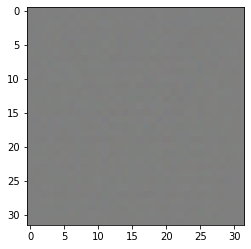

In [49]:
# exemple de generation d'une image pour un point specific dans l'espace latent
from keras.models import load_model
from numpy import asarray
from matplotlib import pyplot
# chargement modele
#model = load_model('generator_model_200.h5')
loaded_model
# all 0s
vector = asarray([[0.75 for _ in range(100)]])
# generation de l'image
#X = model.predict(vector)
X = loaded_model.predict(vector)
# mise à l'échelle [-1,1] to [0,1]
X = (X + 1) / 2.0
# affichage du resultat
pyplot.imshow(X[0, :, :])
pyplot.show()

In [57]:
# example of loading the generator model and generating images
from keras.models import load_model
from numpy.random import randn
import matplotlib as plt
from matplotlib import pyplot
import h5py
import time

# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n_samples):
    # generate points in the latent space
    x_input = randn(latent_dim * n_samples)
    # reshape into a batch of inputs for the network
    x_input = x_input.reshape(n_samples, latent_dim)
    return x_input

# plot the generated images
def create_plot(examples, n):
    # plot images
    for i in range(n * n):
        # define subplot
        pyplot.subplot(n, n, 1 + i)
        # turn off axis
        pyplot.axis('off')
        # plot raw pixel data
        pyplot.imshow(examples[i, :, :])
    pyplot.show()
    plt.pyplot.imsave("/Users/arnaud.baleh/Desktop/dataIA/projetFilRouge/imageCartoon.png",examples[n])
    fin = time.time()
    temps = fin - debut
    print(temps)
    
# load model
debut = time.time()
#model = load_model('generator_model_200.h5')
b
#model = load_model('test_hdfdict.h5')
# generate images
latent_points = generate_latent_points(100, 100)
# generate images
#X = model.predict(latent_points)
X = b.predict(latent_points)
# scale from [-1,1] to [0,1]
X = (X + 1) / 2.0
# plot the result
create_plot(X, 1)

AttributeError: 'dict' object has no attribute 'predict'

In [75]:
import h5py
import hdfdict
import csv
import pandas as pd
import pymongo
import numpy as np
import json
import tensorflow as tf
import deepdish as dd
from keras.models import load_model

In [4]:
print(type('generator_model_200.h5'))

<class 'str'>


In [18]:
#fonction pour lire fichier h5, et le transformer en dico
def read_hdf5(path):

    weights = {}
    
    keys = []
    with h5py.File(path, 'r') as f: # open file
        f.visit(keys.append) # append all keys to list
        for key in keys:
            if ':' in key: # contains data if ':' in key
                print(f[key].name)
                weights[f[key].name] = f[key].value
    return weights

In [19]:
weights = read_hdf5('generator_model_200.h5')

/model_weights/conv2d_109/conv2d_109/bias:0
/model_weights/conv2d_109/conv2d_109/kernel:0
/model_weights/conv2d_transpose_63/conv2d_transpose_63/bias:0
/model_weights/conv2d_transpose_63/conv2d_transpose_63/kernel:0
/model_weights/conv2d_transpose_64/conv2d_transpose_64/bias:0
/model_weights/conv2d_transpose_64/conv2d_transpose_64/kernel:0
/model_weights/conv2d_transpose_65/conv2d_transpose_65/bias:0
/model_weights/conv2d_transpose_65/conv2d_transpose_65/kernel:0
/model_weights/dense_43/dense_43/bias:0
/model_weights/dense_43/dense_43/kernel:0


C:\Users\arnaud.baleh\Anaconda3\envs\cifar\lib\site-packages\ipykernel_launcher.py:12: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  if sys.path[0] == '':


In [41]:
print(type(weights))

<class 'dict'>


In [42]:
weights

{'/model_weights/conv2d_109/conv2d_109/bias:0': array([ 0.03667034, -0.00771399, -0.0051891 ], dtype=float32),
 '/model_weights/conv2d_109/conv2d_109/kernel:0': array([[[[-0.05539365,  0.01097946, -0.01458764],
          [-0.04828713, -0.02252652, -0.06132348],
          [-0.07486061, -0.0971461 , -0.07942382],
          ...,
          [ 0.01409907, -0.06872979, -0.01093184],
          [ 0.02035505,  0.06357672, -0.04376132],
          [-0.03354242, -0.02712707,  0.03885866]],
 
         [[-0.00416177,  0.07359311,  0.04134859],
          [-0.00557275, -0.08501251, -0.05794723],
          [-0.03965241, -0.10709412, -0.093582  ],
          ...,
          [ 0.04381969, -0.01901347,  0.06846523],
          [-0.01002873, -0.0248579 , -0.03142954],
          [-0.0714575 , -0.0218326 , -0.00841742]],
 
         [[ 0.03430504,  0.05896921,  0.0295967 ],
          [ 0.03937164, -0.05179343, -0.07148816],
          [ 0.01302236,  0.01739829, -0.04256487],
          ...,
          [-0.00885347, 

In [9]:
print(weights)

{'/model_weights/conv2d_109/conv2d_109/bias:0': array([ 0.03667034, -0.00771399, -0.0051891 ], dtype=float32), '/model_weights/conv2d_109/conv2d_109/kernel:0': array([[[[-0.05539365,  0.01097946, -0.01458764],
         [-0.04828713, -0.02252652, -0.06132348],
         [-0.07486061, -0.0971461 , -0.07942382],
         ...,
         [ 0.01409907, -0.06872979, -0.01093184],
         [ 0.02035505,  0.06357672, -0.04376132],
         [-0.03354242, -0.02712707,  0.03885866]],

        [[-0.00416177,  0.07359311,  0.04134859],
         [-0.00557275, -0.08501251, -0.05794723],
         [-0.03965241, -0.10709412, -0.093582  ],
         ...,
         [ 0.04381969, -0.01901347,  0.06846523],
         [-0.01002873, -0.0248579 , -0.03142954],
         [-0.0714575 , -0.0218326 , -0.00841742]],

        [[ 0.03430504,  0.05896921,  0.0295967 ],
         [ 0.03937164, -0.05179343, -0.07148816],
         [ 0.01302236,  0.01739829, -0.04256487],
         ...,
         [-0.00885347, -0.01725456,  0.01795

In [ ]:
#Debut**************************mongoDB

In [71]:
import pandas as pd
import pymongo
import numpy as np
import pickle

In [77]:
model_cartoon = load_model('generator_model_cartoon_200.h5')

In [78]:
model_cartoon

In [80]:
def save_model_to_db(model, client, db, dbconnection, model_name):
    import pickle
    import time
    import pymongo
    #pickling the model
    pickled_model = pickle.dumps(model)
    
    #saving model to mongoDB
    # creating connection
    myclient = pymongo.MongoClient(client)
    
    #creating database in mongodb
    mydb = myclient[db]
    
    #creating collection
    mycon = mydb[dbconnection]
    info = mycon.insert_one({model_name: pickled_model, 'name': model_name, 'created_time':time.time()})
    print(info.inserted_id, ' saved with this id successfully!')
    
    details = {
        'inserted_id':info.inserted_id,
        'model_name':model_name,
        'created_time':time.time()
    }
    
    return details

In [66]:
def load_saved_model_from_db(model_name, client, db, dbconnection):
    json_data = {}
    
    #saving model to mongoDB
    # creating connection
    myclient = pymongo.MongoClient(client)
    
    #creating database in mongodb
    mydb = myclient[db]
    
    #creating collection
    mycon = mydb[dbconnection]
    data = mycon.find({'name': model_name})
    
    
    for i in data:
        json_data = i
    #fetching model from db
    pickled_model = json_data[model_name]
    
    return pickle.loads(pickled_model)

In [81]:
#saving model to mongo
details = save_model_to_db(model = model, client ='mongodb://localhost:27017/', db = 'ChefOeuvre', 
                 dbconnection = 'modelGAN', model_name = 'modelStoreGan')

TypeError: can't pickle _thread.RLock objects

In [ ]:
#fetching model from mongo
modelLoaded  = load_saved_model_from_db(model_name = details['model_Gan'], client = 'mongodb://localhost:27017/', 
                         db = 'datasetChefOeuvre', dbconnection = 'model_GAN')

In [ ]:
#Fin**************************mongoDB

In [84]:
from pymongo import MongoClient

In [85]:
client = MongoClient('mongodb://localhost:27017/?readPreference=primary&appname=MongoDB%20Compass%20Community&ssl=false')
filter={}

result = client['datasetChefOeuvre']['model'].find(
filter=filter
)

In [86]:
result

In [90]:
chaineDic = {}
for ele in result:
    chaineDic += ele

In [91]:
chaineDic

{}

In [49]:
myclient = pymongo.MongoClient("mongodb://localhost:27017/")
mydb = myclient["datasetChefOeuvre"]
mycol = mydb["model"]
cursor = mycol.find()

In [50]:
json_data = {}
for document in cursor:
    json_data = document

In [51]:
json_data

{'_id': ObjectId('5fda2d469c7cd25978decd18'),
 'class_name': 'Sequential',
 'config': {'name': 'sequential_64',
  'layers': [{'class_name': 'InputLayer',
    'config': {'batch_input_shape': [None, 100],
     'dtype': 'float32',
     'sparse': False,
     'ragged': False,
     'name': 'dense_43_input'}},
   {'class_name': 'Dense',
    'config': {'name': 'dense_43',
     'trainable': True,
     'batch_input_shape': [None, 100],
     'dtype': 'float32',
     'units': 4096,
     'activation': 'linear',
     'use_bias': True,
     'kernel_initializer': {'class_name': 'GlorotUniform',
      'config': {'seed': None}},
     'bias_initializer': {'class_name': 'Zeros', 'config': {}},
     'kernel_regularizer': None,
     'bias_regularizer': None,
     'activity_regularizer': None,
     'kernel_constraint': None,
     'bias_constraint': None}},
   {'class_name': 'LeakyReLU',
    'config': {'name': 'leaky_re_lu_172',
     'trainable': True,
     'dtype': 'float32',
     'alpha': 0.2000000029802322

In [95]:
print(type(json_data))

<class 'dict'>


In [53]:
pickled_model = json_data[document]

TypeError: unhashable type: 'dict'

In [54]:
with open('filename.pickle', 'wb') as handle:
    pickle.dump(json_data, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [55]:
with open('filename.pickle', 'rb') as handle:
    b = pickle.load(handle)

In [62]:
b = pd.DataFrame(b)

In [63]:
b.to_yaml()

AttributeError: 'DataFrame' object has no attribute 'to_yaml'

In [5]:
config = model.to_yaml()

In [6]:
print(type(config))

<class 'str'>


In [7]:
config

'backend: tensorflow\nclass_name: Sequential\nconfig:\n  layers:\n  - class_name: InputLayer\n    config:\n      batch_input_shape: !!python/tuple\n      - null\n      - 100\n      dtype: float32\n      name: dense_43_input\n      ragged: false\n      sparse: false\n  - class_name: Dense\n    config:\n      activation: linear\n      activity_regularizer: null\n      batch_input_shape: !!python/tuple\n      - null\n      - 100\n      bias_constraint: null\n      bias_initializer:\n        class_name: Zeros\n        config: {}\n      bias_regularizer: null\n      dtype: float32\n      kernel_constraint: null\n      kernel_initializer:\n        class_name: GlorotUniform\n        config:\n          seed: null\n      kernel_regularizer: null\n      name: dense_43\n      trainable: true\n      units: 4096\n      use_bias: true\n  - class_name: LeakyReLU\n    config:\n      alpha: 0.20000000298023224\n      dtype: float32\n      name: leaky_re_lu_172\n      trainable: true\n  - class_name: Re

In [ ]:
model = load_model('generator_model_cartoon_200.h5')
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("modelWeightsCartoon.h5")

In [118]:
import json
from pymongo import MongoClient

model = load_model('generator_model_cartoon_200.h5')
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("modelWeightsCartoon.h5")

client = MongoClient('localhost', 27017)
db = client['datasetChefOeuvre']
mycol = db['model']

with open('model.json') as f:
    file_data = json.load(f)

mycol.insert_many(file_data)

client.close()  

Saved model to disk


In [8]:
from keras.models import model_from_json
import pandas as pd
from bson.json_util import dumps

In [92]:
myclient = pymongo.MongoClient("mongodb://localhost:27017/")
mydb = myclient["datasetChefOeuvre"]
mycol = mydb["model"]

In [93]:
cursor = mycol.find({})

In [94]:
with open('collection.json', 'w') as file:
    for document in cursor:
        file.write(dumps(document))

In [ ]:
mycol.insertOne(myobj,

In [ ]:
#***********************************

In [13]:
with open("DraftcollectionModel.yaml", "w") as yaml_file:
    for document in cursor:
        yaml_file.write(dump(document))
        #yaml_file.write(document.to_yaml())

In [25]:
liste = []
for document in cursor:
    liste.append(document)

In [19]:
liste

[{'_id': ObjectId('5fda2d469c7cd25978decd18'),
  'class_name': 'Sequential',
  'config': {'name': 'sequential_64',
   'layers': [{'class_name': 'InputLayer',
     'config': {'batch_input_shape': [None, 100],
      'dtype': 'float32',
      'sparse': False,
      'ragged': False,
      'name': 'dense_43_input'}},
    {'class_name': 'Dense',
     'config': {'name': 'dense_43',
      'trainable': True,
      'batch_input_shape': [None, 100],
      'dtype': 'float32',
      'units': 4096,
      'activation': 'linear',
      'use_bias': True,
      'kernel_initializer': {'class_name': 'GlorotUniform',
       'config': {'seed': None}},
      'bias_initializer': {'class_name': 'Zeros', 'config': {}},
      'kernel_regularizer': None,
      'bias_regularizer': None,
      'activity_regularizer': None,
      'kernel_constraint': None,
      'bias_constraint': None}},
    {'class_name': 'LeakyReLU',
     'config': {'name': 'leaky_re_lu_172',
      'trainable': True,
      'dtype': 'float32',
   

In [142]:
print(type(liste))

<class 'list'>


In [7]:
liste = list(liste)

In [10]:
liste = liste.to_json()

AttributeError: 'list' object has no attribute 'to_json'

In [59]:
# serialize model to YAML
model_yaml = model.to_yaml()
with open("model.yaml", "w") as yaml_file:
    yaml_file.write(model_yaml)

In [22]:

for document in cursor:
    print(document)

In [141]:
jsonStr = json.dumps(liste)json.encode(analytics, cls=JSONEncoder)

TypeError: Object of type ObjectId is not JSON serializable

In [145]:
jsonStr = json.encode(liste, cls=JSONEncoder)

AttributeError: module 'json' has no attribute 'encode'

In [133]:
jsonStr

'[]'

In [53]:
# load json and create model
json_file = open('collection.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("modelWeightsCartoon.h5")
print("Loaded model from disk")

Loaded model from disk


In [115]:
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Loaded model from disk


In [30]:
print(type(config))

<class 'str'>


In [47]:
#weightsdic = json.dumps(weights)
weightsStr = json.dumps(weights)

TypeError: Object of type ndarray is not JSON serializable

In [43]:
#enregistrement sous json file
with open('dataCartoon.json', 'w') as outfile:
    json.dump(weights, outfile)

TypeError: Object of type ndarray is not JSON serializable

In [35]:
#lecture json file
with open('dataCartoon.json') as json_file:
    configL = json.load(json_file)

In [38]:
loaded_model = tf.keras.models.model_from_json(configL)

In [24]:
dd.io.load('generator_model_150.h5', weights)

(array([ 0.03877286, -0.01088105, -0.00362408], dtype=float32),
 array([[[[-0.05635743,  0.00857492, -0.02679671],
          [-0.0530743 , -0.01905947, -0.06407692],
          [-0.07632697, -0.10215205, -0.08100853],
          ...,
          [ 0.0165966 , -0.06085926, -0.03284316],
          [ 0.01248326,  0.05546371, -0.05357171],
          [-0.02779075, -0.04054041,  0.04409675]],
 
         [[ 0.00140701,  0.06480746,  0.03458156],
          [-0.0010236 , -0.07611895, -0.03026785],
          [-0.03547163, -0.10156406, -0.08492389],
          ...,
          [ 0.04070642, -0.02124945,  0.06230974],
          [-0.01381033, -0.03211916, -0.03936062],
          [-0.06526399, -0.00633404, -0.00017548]],
 
         [[ 0.03853958,  0.04919264,  0.02808776],
          [ 0.0467238 , -0.05840876, -0.0787461 ],
          [ 0.00900214,  0.01533252, -0.04965741],
          ...,
          [ 0.00216014, -0.01163287,  0.00752117],
          [ 0.06531501,  0.02363967,  0.08277393],
          [-0.0025

In [25]:
print(type(weights))

<class 'dict'>


In [26]:
dd.io.save('test.h5', weights)

ValueError: the ``/`` character is not allowed in object names: '/model_weights/conv2d_109/conv2d_109/bias:0'

In [ ]:
"""
nous avons crée un dict à partir d'un fichier h5, maintenant creation d'un h5 à partir d'un dico

In [10]:
fname = 'test_hdfdict.h5'
hdfdict.dump(weights, fname)
res = hdfdict.load(fname)

C:\Users\arnaud.baleh\Anaconda3\envs\cifar\lib\site-packages\hdfdict\hdfdict.py:22: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  yield h5py.File(hdf, *args, **kwargs)


In [11]:
print(type(res))

<class 'hdfdict.hdfdict.LazyHdfDict'>


In [13]:
print(res)

{'model_weights': {'conv2d_109': {'conv2d_109': {'bias:0': <HDF5 dataset "bias:0": shape (3,), type "<f4">, 'kernel:0': <HDF5 dataset "kernel:0": shape (3, 3, 128, 3), type "<f4">}}, 'conv2d_transpose_63': {'conv2d_transpose_63': {'bias:0': <HDF5 dataset "bias:0": shape (128,), type "<f4">, 'kernel:0': <HDF5 dataset "kernel:0": shape (4, 4, 128, 256), type "<f4">}}, 'conv2d_transpose_64': {'conv2d_transpose_64': {'bias:0': <HDF5 dataset "bias:0": shape (128,), type "<f4">, 'kernel:0': <HDF5 dataset "kernel:0": shape (4, 4, 128, 128), type "<f4">}}, 'conv2d_transpose_65': {'conv2d_transpose_65': {'bias:0': <HDF5 dataset "bias:0": shape (128,), type "<f4">, 'kernel:0': <HDF5 dataset "kernel:0": shape (4, 4, 128, 128), type "<f4">}}, 'dense_43': {'dense_43': {'bias:0': <HDF5 dataset "bias:0": shape (4096,), type "<f4">, 'kernel:0': <HDF5 dataset "kernel:0": shape (100, 4096), type "<f4">}}}}


In [15]:
print(res.unlazy())

None


In [15]:
#creation d'un fichier csv à partir du dico
with open('generator_model_cartoon.csv', 'w') as f:
    for key in weights.keys():
        f.write("%s,%s\n"%(key,weights[key]))

In [ ]:
"""
nous avons crée un dict à partir d'un fichier h5, puis de dict à csv file, maintenant
opération inverse : de csv à dict, puis de dict à h5
"""

In [119]:
myclient = pymongo.MongoClient("mongodb://localhost:27017/")
mydb = myclient["datasetChefOeuvre"]
#mycol = mydb["model_generator_cartoon"]
mycol = mydb["model"]

In [120]:
mycol.find_one()

{'_id': ObjectId('5fda2d469c7cd25978decd18'),
 'class_name': 'Sequential',
 'config': {'name': 'sequential_64',
  'layers': [{'class_name': 'InputLayer',
    'config': {'batch_input_shape': [None, 100],
     'dtype': 'float32',
     'sparse': False,
     'ragged': False,
     'name': 'dense_43_input'}},
   {'class_name': 'Dense',
    'config': {'name': 'dense_43',
     'trainable': True,
     'batch_input_shape': [None, 100],
     'dtype': 'float32',
     'units': 4096,
     'activation': 'linear',
     'use_bias': True,
     'kernel_initializer': {'class_name': 'GlorotUniform',
      'config': {'seed': None}},
     'bias_initializer': {'class_name': 'Zeros', 'config': {}},
     'kernel_regularizer': None,
     'bias_regularizer': None,
     'activity_regularizer': None,
     'kernel_constraint': None,
     'bias_constraint': None}},
   {'class_name': 'LeakyReLU',
    'config': {'name': 'leaky_re_lu_172',
     'trainable': True,
     'dtype': 'float32',
     'alpha': 0.2000000029802322

In [121]:
for doc in mycol.find():
    for i in doc:
        print(i, doc[i])

_id 5fda2d469c7cd25978decd18
class_name Sequential
config {'name': 'sequential_64', 'layers': [{'class_name': 'InputLayer', 'config': {'batch_input_shape': [None, 100], 'dtype': 'float32', 'sparse': False, 'ragged': False, 'name': 'dense_43_input'}}, {'class_name': 'Dense', 'config': {'name': 'dense_43', 'trainable': True, 'batch_input_shape': [None, 100], 'dtype': 'float32', 'units': 4096, 'activation': 'linear', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}}, {'class_name': 'LeakyReLU', 'config': {'name': 'leaky_re_lu_172', 'trainable': True, 'dtype': 'float32', 'alpha': 0.20000000298023224}}, {'class_name': 'Reshape', 'config': {'name': 'reshape_21', 'trainable': True, 'dtype': 'float32', 'target_shape': [4, 4, 256]}}, {'class_name': 'Conv

In [100]:
dictio = {}
liste = ["riri","fifi","loulou"]
for i in range(0,len(liste)):
    dictio[i] = liste

In [101]:
dictio

{0: ['riri', 'fifi', 'loulou'],
 1: ['riri', 'fifi', 'loulou'],
 2: ['riri', 'fifi', 'loulou']}

In [105]:
def save_dict_to_hdf5(dic, filename):

    with h5py.File(filename, 'w') as h5file:
        recursively_save_dict_contents_to_group(h5file, '/', dic)

def load_dict_from_hdf5(filename):

    with h5py.File(filename, 'r') as h5file:
        return recursively_load_dict_contents_from_group(h5file, '/')



def recursively_save_dict_contents_to_group( h5file, path, dic):

    # argument type checking
    if not isinstance(dic, dict):
        raise ValueError("must provide a dictionary")        

    if not isinstance(path, str):
        raise ValueError("path must be a string")
    if not isinstance(h5file, h5py._hl.files.File):
        raise ValueError("must be an open h5py file")
    # save items to the hdf5 file
    for key, item in dic.items():
        #print(key,item)
        key = str(key)
        if isinstance(item, list):
            item = np.array(item)
            #print(item)
        if not isinstance(key, str):
            raise ValueError("dict keys must be strings to save to hdf5")
        # save strings, numpy.int64, and numpy.float64 types
        if isinstance(item, (np.int64, np.float64, str, np.float, float, np.float32,int)):
            #print( 'here' )
            h5file[path + key] = item
            if not h5file[path + key].value == item:
                raise ValueError('The data representation in the HDF5 file does not match the original dict.')
        # save numpy arrays
        elif isinstance(item, np.ndarray):            
            try:
                h5file[path + key] = item
            except:
                item = np.array(item).astype('|S9')
                h5file[path + key] = item
            if not np.array_equal(h5file[path + key].value, item):
                raise ValueError('The data representation in the HDF5 file does not match the original dict.')
        # save dictionaries
        elif isinstance(item, dict):
            recursively_save_dict_contents_to_group(h5file, path + key + '/', item)
        # other types cannot be saved and will result in an error
        else:
            #print(item)
            raise ValueError('Cannot save %s type.' % type(item))

def recursively_load_dict_contents_from_group( h5file, path): 

    ans = {}
    for key, item in h5file[path].items():
        if isinstance(item, h5py._hl.dataset.Dataset):
            ans[key] = item.value
        elif isinstance(item, h5py._hl.group.Group):
            ans[key] = recursively_load_dict_contents_from_group(h5file, path + key + '/')
    return ans            

In [102]:
modelDict = {}
for doc in mycol.find({}):
    for i in doc:
        modelDict[i] = doc[i]

In [106]:
modelH5Loaoded = save_dict_to_hdf5(modelDict,"modelH5Loaded")

ValueError: Cannot save <class 'bson.objectid.ObjectId'> type.

In [103]:
modelDict

{'_id': ObjectId('5fd24ca2e7d3cc39a0b2ec3e'),
 '�HDF': '\x00\x00\x00\x00\x00\x08\x08\x00\x04\x00\x10\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00����������Y\x00\x00\x00\x00\x00��������\x00\x00\x00\x00\x00\x00\x00\x00`\x00\x00\x00\x00\x00\x00\x00\x01\x00\x00\x00\x00\x00\x00\x00�\x00\x00\x00\x00\x00\x00\x00�\x02\x00\x00\x00\x00\x00\x00\x01\x00\x06\x00\x01\x00\x00\x00\x18\x00\x00\x00\x00\x00\x00\x00\x10\x00\x10\x00\x00\x00\x00\x00 \x03\x00\x00\x00\x00\x00\x00\x18\x01\x00\x00\x00\x00\x00\x00TREE\x00\x00\x01\x00����������������\x00\x00\x00\x00\x00\x00\x00\x00\x00\x18\x00\x00\x00\x00\x00\x00\x08\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\

In [92]:
cursor = mycol.find({})

In [61]:
print(type(cursor))

<class 'pymongo.cursor.Cursor'>


In [93]:
liste = []
for document in cursor:
    liste.append(document)

In [94]:
liste

[{'_id': ObjectId('5fd24ca1e7d3cc39a0b2c71c'), '�HDF': '\x1a'},
 {'_id': ObjectId('5fd24ca1e7d3cc39a0b2c71d'),
  '�HDF': '\x00\x00\x00\x00\x00\x08\x08\x00\x04\x00\x10\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00����������Y\x00\x00\x00\x00\x00��������\x00\x00\x00\x00\x00\x00\x00\x00`\x00\x00\x00\x00\x00\x00\x00\x01\x00\x00\x00\x00\x00\x00\x00�\x00\x00\x00\x00\x00\x00\x00�\x02\x00\x00\x00\x00\x00\x00\x01\x00\x06\x00\x01\x00\x00\x00\x18\x00\x00\x00\x00\x00\x00\x00\x10\x00\x10\x00\x00\x00\x00\x00 \x03\x00\x00\x00\x00\x00\x00\x18\x01\x00\x00\x00\x00\x00\x00TREE\x00\x00\x01\x00����������������\x00\x00\x00\x00\x00\x00\x00\x00\x00\x18\x00\x00\x00\x00\x00\x00\x08\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x0

In [95]:
len(liste)

9507

In [96]:
res_dct = {liste[i]: liste[i + 1] for i in range(0, len(liste), 2)}

TypeError: unhashable type: 'dict'

In [58]:
print(type(liste))

<class 'list'>


In [31]:
arr = np.array(liste)

In [32]:
print(type(arr))

<class 'numpy.ndarray'>


In [35]:
print(arr.shape)

(842,)


In [34]:
h5f = h5py.File('data.h5', 'w')
h5f.create_dataset('model_generator_cartoon', data=arr)

TypeError: Object dtype dtype('O') has no native HDF5 equivalent

In [ ]:
h5f = h5py.File('data.h5','r')
modelLoad = h5f['model_generator_cartoon'][:]
h5f.close()

In [25]:
model_cartoon = pd.read_csv(cursor)

ValueError: Invalid file path or buffer object type: <class 'pymongo.cursor.Cursor'>

In [20]:
print(type(model_cartoon))

<class 'pandas.core.frame.DataFrame'>


In [19]:
modelh5 = h5py.File(model_cartoon, 'r')

TypeError: expected str, bytes or os.PathLike object, not DataFrame

In [5]:
dataset = h5py.File('generator_model_200.h5', 'r')

In [7]:
dataset.keys()

<KeysViewHDF5 ['model_weights']>

In [9]:
weights = dataset['model_weights']
weights.keys()

<KeysViewHDF5 ['conv2d_109', 'conv2d_transpose_63', 'conv2d_transpose_64', 'conv2d_transpose_65', 'dense_43', 'leaky_re_lu_172', 'leaky_re_lu_173', 'leaky_re_lu_174', 'leaky_re_lu_175', 'reshape_21']>

In [10]:
dataset.to_csv("generator_model_cartoons_200.csv", index = False)

AttributeError: 'File' object has no attribute 'to_csv'

In [2]:
print(type(model))

<class 'tensorflow.python.keras.engine.sequential.Sequential'>


In [3]:
print(model.shape)

AttributeError: 'Sequential' object has no attribute 'shape'

In [8]:
import re

In [60]:
chaine = "{'_id': ObjectId('5fda2d469c7cd25978decd18'), 'class_name': 'Sequential', 'config': {'name': 'sequential_64', 'layers': [{'class_name': 'InputLayer', 'config': {'batch_input_shape': [None, 100], 'dtype': 'float32', 'sparse': False, 'ragged': False, 'name': 'dense_43_input'}}, {'class_name': 'Dense', 'config': {'name': 'dense_43', 'trainable': True, 'batch_input_shape': [None, 100], 'dtype': 'float32', 'units': 4096, 'activation': 'linear', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}}, {'class_name': 'LeakyReLU', 'config': {'name': 'leaky_re_lu_172', 'trainable': True, 'dtype': 'float32', 'alpha': 0.20000000298023224}}, {'class_name': 'Reshape', 'config': {'name': 'reshape_21', 'trainable': True, 'dtype': 'float32', 'target_shape': [4, 4, 256]}}, {'class_name': 'Conv2DTranspose', 'config': {'name': 'conv2d_transpose_63', 'trainable': True, 'dtype': 'float32', 'filters': 128, 'kernel_size': [4, 4], 'strides': [2, 2], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None, 'output_padding': None}}, {'class_name': 'LeakyReLU', 'config': {'name': 'leaky_re_lu_173', 'trainable': True, 'dtype': 'float32', 'alpha': 0.20000000298023224}}, {'class_name': 'Conv2DTranspose', 'config': {'name': 'conv2d_transpose_64', 'trainable': True, 'dtype': 'float32', 'filters': 128, 'kernel_size': [4, 4], 'strides': [2, 2], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None, 'output_padding': None}}, {'class_name': 'LeakyReLU', 'config': {'name': 'leaky_re_lu_174', 'trainable': True, 'dtype': 'float32', 'alpha': 0.20000000298023224}}, {'class_name': 'Conv2DTranspose', 'config': {'name': 'conv2d_transpose_65', 'trainable': True, 'dtype': 'float32', 'filters': 128, 'kernel_size': [4, 4], 'strides': [2, 2], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'linear', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None, 'output_padding': None}}, {'class_name': 'LeakyReLU', 'config': {'name': 'leaky_re_lu_175', 'trainable': True, 'dtype': 'float32', 'alpha': 0.20000000298023224}}, {'class_name': 'Conv2D', 'config': {'name': 'conv2d_109', 'trainable': True, 'dtype': 'float32', 'filters': 3, 'kernel_size': [3, 3], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'tanh', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}}]}, 'keras_version': '2.4.0', 'backend': 'tensorflow'}"

In [61]:
chaine2 = re.sub('\'', '"', chaine)

In [62]:
chaine2

'{"_id": ObjectId("5fda2d469c7cd25978decd18"), "class_name": "Sequential", "config": {"name": "sequential_64", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [None, 100], "dtype": "float32", "sparse": False, "ragged": False, "name": "dense_43_input"}}, {"class_name": "Dense", "config": {"name": "dense_43", "trainable": True, "batch_input_shape": [None, 100], "dtype": "float32", "units": 4096, "activation": "linear", "use_bias": True, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": None}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": None, "bias_regularizer": None, "activity_regularizer": None, "kernel_constraint": None, "bias_constraint": None}}, {"class_name": "LeakyReLU", "config": {"name": "leaky_re_lu_172", "trainable": True, "dtype": "float32", "alpha": 0.20000000298023224}}, {"class_name": "Reshape", "config": {"name": "reshape_21", "trainable": True, "dtype": "float32", "target_shape": [4, 4, 2

In [65]:
#45 caractères, 24 dans l'id
pattern = '"_id": ObjectId\(\"[a-zA-Z0-9_]{24}\"\),\s'
chaine3 = re.sub(pattern, '', chaine2)

In [66]:
chaine3

'{"class_name": "Sequential", "config": {"name": "sequential_64", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [None, 100], "dtype": "float32", "sparse": False, "ragged": False, "name": "dense_43_input"}}, {"class_name": "Dense", "config": {"name": "dense_43", "trainable": True, "batch_input_shape": [None, 100], "dtype": "float32", "units": 4096, "activation": "linear", "use_bias": True, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": None}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": None, "bias_regularizer": None, "activity_regularizer": None, "kernel_constraint": None, "bias_constraint": None}}, {"class_name": "LeakyReLU", "config": {"name": "leaky_re_lu_172", "trainable": True, "dtype": "float32", "alpha": 0.20000000298023224}}, {"class_name": "Reshape", "config": {"name": "reshape_21", "trainable": True, "dtype": "float32", "target_shape": [4, 4, 256]}}, {"class_name": "Conv2DTranspose", "con

In [67]:
chaine3 = re.sub("None", 'null', chaine3)
chaine3 = re.sub("False", 'false', chaine3)
chaine3 = re.sub("True", 'true', chaine3)

In [68]:
chaine3

'{"class_name": "Sequential", "config": {"name": "sequential_64", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 100], "dtype": "float32", "sparse": false, "ragged": false, "name": "dense_43_input"}}, {"class_name": "Dense", "config": {"name": "dense_43", "trainable": true, "batch_input_shape": [null, 100], "dtype": "float32", "units": 4096, "activation": "linear", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "LeakyReLU", "config": {"name": "leaky_re_lu_172", "trainable": true, "dtype": "float32", "alpha": 0.20000000298023224}}, {"class_name": "Reshape", "config": {"name": "reshape_21", "trainable": true, "dtype": "float32", "target_shape": [4, 4, 256]}}, {"class_name": "Conv2DTranspose", "con